In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow.keras as kera
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Input, Flatten
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy, SparseCategoricalCrossentropy, MeanSquaredError
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.activations import linear

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy import sqrt

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [3]:
train_df.head(10)

,id,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_122,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,target
0,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
1,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
2,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
3,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
4,13,A,B,A,A,A,A,A,A,B,...,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792,5142.87
5,14,A,A,A,A,B,A,A,A,A,...,0.381515,0.363768,0.24564,0.40455,0.47225,0.334828,0.352251,0.342239,0.382931,1132.22
6,20,A,B,A,B,A,A,A,A,B,...,0.867021,0.583389,0.90267,0.84847,0.80218,0.644013,0.785706,0.859764,0.242416,3585.75
7,23,A,B,B,B,B,A,A,A,B,...,0.628534,0.384099,0.61229,0.38249,0.51111,0.682315,0.669033,0.756454,0.361191,10280.20
8,24,A,B,A,A,B,B,A,A,B,...,0.713343,0.469223,0.30260,0.67135,0.83510,0.863052,0.879347,0.822493,0.294523,6184.59
9,33,A,B,A,A,B,A,A,A,B,...,0.314683,0.370419,0.58354,0.46226,0.38016,0.644013,0.665644,0.339244,0.799124,5965.73


In [4]:
train_df.tail(10)

,id,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_122,col_123,col_124,col_125,col_126,col_127,col_128,col_129,col_130,target
169476,587605,B,A,A,A,A,B,A,A,A,...,0.599275,0.548122,0.48864,0.45391,0.64056,0.592525,0.590961,0.701266,0.362479,1173.30
169477,587606,A,A,A,A,B,A,A,A,A,...,0.201125,0.259395,0.24564,0.30859,0.21983,0.207238,0.204687,0.357400,0.348217,2161.12
169478,587607,A,B,A,B,B,B,A,A,B,...,0.269520,0.338963,0.33906,0.28066,0.30529,0.245410,0.261799,0.181433,0.398571,4080.42
169479,587612,A,A,A,A,B,A,A,A,A,...,0.502705,0.473897,0.43518,0.66201,0.58257,0.415029,0.406090,0.354344,0.377315,994.85
169480,587619,A,A,A,A,A,B,A,A,A,...,0.445008,0.377930,0.36636,0.29095,0.44467,0.327915,0.321570,0.731059,0.721499,804.28
169481,587620,A,B,A,A,A,A,A,A,B,...,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,1198.62
169482,587624,A,A,A,A,A,B,A,A,A,...,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,1108.34
169483,587630,A,B,A,A,A,A,A,B,B,...,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,5762.64
169484,587632,A,B,A,A,A,A,A,A,B,...,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,1562.87
169485,587633,B,A,A,B,A,A,A,A,A,...,0.844563,0.533048,0.97123,0.93383,0.83814,0.932195,0.946432,0.810511,0.721460,4751.72


In [5]:
%%time
cat = [f'col_{i}' for i in range(1, 117)]
con = [f'col_{i}' for i in range(117, 131)]
for c in cat:
    train_df[c] = train_df[c].astype('category')
    test_df[c] = test_df[c].astype('category')
    train_df[c] = train_df[c].cat.codes
    test_df[c] = test_df[c].cat.codes
del c
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

Wall time: 6.49 s


In [6]:
train_df.columns

Index(['col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8',
       'col_9', 'col_10',
       ...
       'col_122', 'col_123', 'col_124', 'col_125', 'col_126', 'col_127',
       'col_128', 'col_129', 'col_130', 'target'],
      dtype='object', length=131)

In [7]:
X = train_df.iloc[:,train_df.columns != 'target'].values
y = train_df.iloc[:,train_df.columns == 'target'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)
del X, y

In [9]:
X_train.shape

(95335, 130)

In [10]:
activation_fn = 'linear'
model = Sequential()
model.add(Input(shape=(130,)))
model.add(Dense(130, activation=activation_fn))
model.add(Dense(65, activation=activation_fn))
model.add(Dense(1, activation=activation_fn))
model.compile(optimizer=RMSprop(learning_rate=1e-3), loss=MeanSquaredError(), metrics=['mse', 'mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 130)               17030     
_________________________________________________________________
dense_1 (Dense)              (None, 65)                8515      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 66        
Total params: 25,611
Trainable params: 25,611
Non-trainable params: 0
_________________________________________________________________


In [11]:
%%time
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), initial_epoch=0)

Epoch 1/10
2980/2980 [==============================] - 2s 800us/step - loss: 5656501.0000 - mse: 5656501.0000 - mae: 1519.1698 - val_loss: 4879659.5000 - val_mse: 4879659.5000 - val_mae: 1409.4530
Epoch 2/10
2980/2980 [==============================] - 2s 792us/step - loss: 4569816.5000 - mse: 4569816.5000 - mae: 1370.0127 - val_loss: 5463400.0000 - val_mse: 5463400.0000 - val_mae: 1415.0492
Epoch 3/10
2980/2980 [==============================] - 2s 591us/step - loss: 4518067.5000 - mse: 4518067.5000 - mae: 1361.9713 - val_loss: 4933912.0000 - val_mse: 4933912.0000 - val_mae: 1501.6271
Epoch 4/10
2980/2980 [==============================] - 2s 705us/step - loss: 4488123.0000 - mse: 4488123.0000 - mae: 1358.6323 - val_loss: 4950209.0000 - val_mse: 4950209.0000 - val_mae: 1342.4918
Epoch 5/10
2980/2980 [==============================] - 2s 713us/step - loss: 4471981.0000 - mse: 4471981.0000 - mae: 1354.5833 - val_loss: 5024965.0000 - val_mse: 5024965.0000 - val_mae: 1543.0216
Epoch 6/10

In [12]:
%%time
model.save('linear/model_10.h5')

Wall time: 474 ms


In [13]:
%%time
new_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), initial_epoch=10)
model.save('linear/model_20.h5')

Epoch 11/20
2980/2980 [==============================] - 2s 650us/step - loss: 4432551.5000 - mse: 4432551.5000 - mae: 1350.2139 - val_loss: 4653923.0000 - val_mse: 4653923.0000 - val_mae: 1372.6890
Epoch 12/20
2980/2980 [==============================] - 2s 635us/step - loss: 4431039.5000 - mse: 4431039.5000 - mae: 1348.7605 - val_loss: 5441443.0000 - val_mse: 5441443.0000 - val_mae: 1430.3870
Epoch 13/20
2980/2980 [==============================] - 3s 877us/step - loss: 4425460.0000 - mse: 4425460.0000 - mae: 1348.5798 - val_loss: 4672544.5000 - val_mse: 4672544.5000 - val_mae: 1396.9385
Epoch 14/20
2980/2980 [==============================] - 2s 792us/step - loss: 4423609.5000 - mse: 4423609.5000 - mae: 1348.2059 - val_loss: 4841058.5000 - val_mse: 4841058.5000 - val_mae: 1312.6704
Epoch 15/20
2980/2980 [==============================] - 2s 651us/step - loss: 4425787.0000 - mse: 4425787.0000 - mae: 1348.1455 - val_loss: 4787951.0000 - val_mse: 4787951.0000 - val_mae: 1451.9036
Epoch

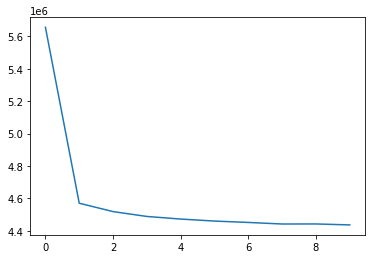

In [14]:
plt.plot(history.history['mse'])

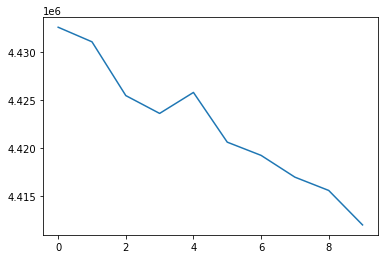

In [15]:
plt.plot(new_history.history['mse'])

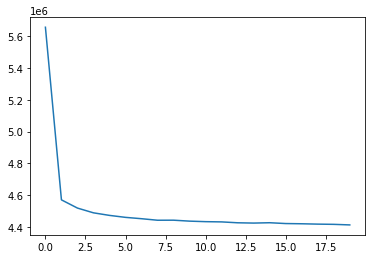

In [16]:
plt.plot(history.history['mse'] + new_history.history['mse'])

In [17]:
mse_history = history.history['mse'] + new_history.history['mse']
mae_history = history.history['mae'] + new_history.history['mae']

In [18]:
%%time
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), initial_epoch=20)
mse_history += history.history['mse']
mae_history += history.history['mae']
model.save('linear/model_50.h5')

Epoch 21/50
2980/2980 [==============================] - 2s 701us/step - loss: 4414046.5000 - mse: 4414046.5000 - mae: 1347.4020 - val_loss: 4658360.5000 - val_mse: 4658360.5000 - val_mae: 1334.6246
Epoch 22/50
2980/2980 [==============================] - 2s 613us/step - loss: 4413654.0000 - mse: 4413654.0000 - mae: 1346.8990 - val_loss: 4689467.0000 - val_mse: 4689467.0000 - val_mae: 1393.7495
Epoch 23/50
2980/2980 [==============================] - 2s 647us/step - loss: 4414424.0000 - mse: 4414424.0000 - mae: 1346.5441 - val_loss: 4777894.0000 - val_mse: 4777894.0000 - val_mae: 1322.9576
Epoch 24/50
2980/2980 [==============================] - 2s 605us/step - loss: 4407308.0000 - mse: 4407308.0000 - mae: 1345.0063 - val_loss: 4651052.5000 - val_mse: 4651052.5000 - val_mae: 1385.3506
Epoch 25/50
2980/2980 [==============================] - 2s 597us/step - loss: 4405935.5000 - mse: 4405935.5000 - mae: 1345.6537 - val_loss: 4650076.0000 - val_mse: 4650076.0000 - val_mae: 1355.0068
Epoch

In [19]:
%%time
init_epochs = 50
epochs_now = 100
history = model.fit(X_train, y_train, epochs=epochs_now, validation_data=(X_val, y_val), initial_epoch=init_epochs)
mse_history += history.history['mse']
mae_history += history.history['mae']
model.save(f'linear/model_{epochs_now}.h5')

Epoch 51/100
2980/2980 [==============================] - 2s 638us/step - loss: 4400065.5000 - mse: 4400065.5000 - mae: 1343.3124 - val_loss: 4683098.0000 - val_mse: 4683098.0000 - val_mae: 1334.4080
Epoch 52/100
2980/2980 [==============================] - 2s 764us/step - loss: 4397822.5000 - mse: 4397822.5000 - mae: 1343.9274 - val_loss: 4759943.0000 - val_mse: 4759943.0000 - val_mae: 1438.1135
Epoch 53/100
2980/2980 [==============================] - 2s 600us/step - loss: 4398131.0000 - mse: 4398131.0000 - mae: 1343.0912 - val_loss: 4673946.0000 - val_mse: 4673946.0000 - val_mae: 1333.2480
Epoch 54/100
2980/2980 [==============================] - 2s 642us/step - loss: 4402047.0000 - mse: 4402047.0000 - mae: 1342.8049 - val_loss: 4925816.0000 - val_mse: 4925816.0000 - val_mae: 1352.8212
Epoch 55/100
2980/2980 [==============================] - 2s 605us/step - loss: 4396214.5000 - mse: 4396214.5000 - mae: 1343.5490 - val_loss: 4678701.5000 - val_mse: 4678701.5000 - val_mae: 1393.2021


Epoch 92/100
2980/2980 [==============================] - 2s 643us/step - loss: 4393317.0000 - mse: 4393317.0000 - mae: 1342.3879 - val_loss: 4728594.5000 - val_mse: 4728594.5000 - val_mae: 1322.0006
Epoch 93/100
2980/2980 [==============================] - 2s 609us/step - loss: 4390815.5000 - mse: 4390815.5000 - mae: 1341.3951 - val_loss: 4668711.5000 - val_mse: 4668711.5000 - val_mae: 1390.8828
Epoch 94/100
2980/2980 [==============================] - 2s 706us/step - loss: 4393593.5000 - mse: 4393593.5000 - mae: 1342.8359 - val_loss: 4634293.5000 - val_mse: 4634293.5000 - val_mae: 1352.5132
Epoch 95/100
2980/2980 [==============================] - 2s 633us/step - loss: 4395031.0000 - mse: 4395031.0000 - mae: 1342.0895 - val_loss: 4706315.0000 - val_mse: 4706315.0000 - val_mae: 1421.7753
Epoch 96/100
2980/2980 [==============================] - 2s 600us/step - loss: 4392993.0000 - mse: 4392993.0000 - mae: 1341.9181 - val_loss: 4665597.5000 - val_mse: 4665597.5000 - val_mae: 1328.9373


In [20]:
%%time
init_epochs = 100
epochs_now = 500
history = model.fit(X_train, y_train, epochs=epochs_now, validation_data=(X_val, y_val), initial_epoch=init_epochs)
mse_history += history.history['mse']
mae_history += history.history['mae']
model.save(f'linear/model_{epochs_now}.h5')

Epoch 101/500
2980/2980 [==============================] - 2s 757us/step - loss: 4393102.5000 - mse: 4393102.5000 - mae: 1341.9683 - val_loss: 4707159.0000 - val_mse: 4707159.0000 - val_mae: 1318.4280
Epoch 102/500
2980/2980 [==============================] - 2s 600us/step - loss: 4393355.5000 - mse: 4393355.5000 - mae: 1342.8750 - val_loss: 4643144.5000 - val_mse: 4643144.5000 - val_mae: 1340.4241
Epoch 103/500
2980/2980 [==============================] - 2s 684us/step - loss: 4393033.5000 - mse: 4393033.5000 - mae: 1342.2711 - val_loss: 4635330.5000 - val_mse: 4635330.5000 - val_mae: 1349.7843
Epoch 104/500
2980/2980 [==============================] - 2s 784us/step - loss: 4393928.5000 - mse: 4393928.5000 - mae: 1341.5817 - val_loss: 4634366.0000 - val_mse: 4634366.0000 - val_mae: 1356.9851
Epoch 105/500
2980/2980 [==============================] - 2s 700us/step - loss: 4393316.0000 - mse: 4393316.0000 - mae: 1342.2632 - val_loss: 4673363.0000 - val_mse: 4673363.0000 - val_mae: 1335.

Epoch 142/500
2980/2980 [==============================] - 3s 848us/step - loss: 4389467.5000 - mse: 4389467.5000 - mae: 1342.2371 - val_loss: 4707538.5000 - val_mse: 4707538.5000 - val_mae: 1409.1150
Epoch 143/500
2980/2980 [==============================] - 2s 728us/step - loss: 4392519.5000 - mse: 4392519.5000 - mae: 1340.7242 - val_loss: 4635763.5000 - val_mse: 4635763.5000 - val_mae: 1360.4949
Epoch 144/500
2980/2980 [==============================] - 2s 593us/step - loss: 4387439.0000 - mse: 4387439.0000 - mae: 1341.0470 - val_loss: 4707610.5000 - val_mse: 4707610.5000 - val_mae: 1327.4642
Epoch 145/500
2980/2980 [==============================] - 2s 684us/step - loss: 4387553.5000 - mse: 4387553.5000 - mae: 1340.3195 - val_loss: 4735015.0000 - val_mse: 4735015.0000 - val_mae: 1422.2510
Epoch 146/500
2980/2980 [==============================] - 2s 685us/step - loss: 4388094.0000 - mse: 4388094.0000 - mae: 1341.5387 - val_loss: 4715653.0000 - val_mse: 4715653.0000 - val_mae: 1350.

Epoch 183/500
2980/2980 [==============================] - 2s 614us/step - loss: 4389307.0000 - mse: 4389307.0000 - mae: 1339.7197 - val_loss: 4685498.5000 - val_mse: 4685498.5000 - val_mae: 1336.5675
Epoch 184/500
2980/2980 [==============================] - 2s 649us/step - loss: 4387727.0000 - mse: 4387727.0000 - mae: 1338.5579 - val_loss: 4690771.0000 - val_mse: 4690771.0000 - val_mae: 1411.1395
Epoch 185/500
2980/2980 [==============================] - 2s 604us/step - loss: 4388114.0000 - mse: 4388114.0000 - mae: 1340.6779 - val_loss: 4634971.0000 - val_mse: 4634971.0000 - val_mae: 1362.4191
Epoch 186/500
2980/2980 [==============================] - 2s 662us/step - loss: 4388404.5000 - mse: 4388404.5000 - mae: 1340.6733 - val_loss: 4642442.0000 - val_mse: 4642442.0000 - val_mae: 1360.7211
Epoch 187/500
2980/2980 [==============================] - 2s 624us/step - loss: 4383037.5000 - mse: 4383037.5000 - mae: 1340.2722 - val_loss: 4755756.0000 - val_mse: 4755756.0000 - val_mae: 1318.

Epoch 224/500
2980/2980 [==============================] - 2s 622us/step - loss: 4385549.0000 - mse: 4385549.0000 - mae: 1339.8271 - val_loss: 4641054.5000 - val_mse: 4641054.5000 - val_mae: 1366.9510
Epoch 225/500
2980/2980 [==============================] - 2s 607us/step - loss: 4386036.5000 - mse: 4386036.5000 - mae: 1340.0056 - val_loss: 4730240.5000 - val_mse: 4730240.5000 - val_mae: 1339.5513
Epoch 226/500
2980/2980 [==============================] - 2s 587us/step - loss: 4385045.0000 - mse: 4385045.0000 - mae: 1341.3376 - val_loss: 4675241.5000 - val_mse: 4675241.5000 - val_mae: 1333.6731
Epoch 227/500
2980/2980 [==============================] - 2s 617us/step - loss: 4385829.0000 - mse: 4385829.0000 - mae: 1339.8098 - val_loss: 4639833.0000 - val_mse: 4639833.0000 - val_mae: 1362.2125
Epoch 228/500
2980/2980 [==============================] - 2s 589us/step - loss: 4390709.5000 - mse: 4390709.5000 - mae: 1340.6558 - val_loss: 4681648.5000 - val_mse: 4681648.5000 - val_mae: 1327.

Epoch 265/500
2980/2980 [==============================] - 2s 662us/step - loss: 4386012.5000 - mse: 4386012.5000 - mae: 1339.4775 - val_loss: 4655924.0000 - val_mse: 4655924.0000 - val_mae: 1385.7582
Epoch 266/500
2980/2980 [==============================] - 2s 620us/step - loss: 4382465.0000 - mse: 4382465.0000 - mae: 1340.3942 - val_loss: 4735630.0000 - val_mse: 4735630.0000 - val_mae: 1334.2350
Epoch 267/500
2980/2980 [==============================] - 2s 680us/step - loss: 4387041.5000 - mse: 4387041.5000 - mae: 1340.1652 - val_loss: 4649602.5000 - val_mse: 4649602.5000 - val_mae: 1383.6991
Epoch 268/500
2980/2980 [==============================] - 2s 631us/step - loss: 4385310.0000 - mse: 4385310.0000 - mae: 1340.9630 - val_loss: 4727791.5000 - val_mse: 4727791.5000 - val_mae: 1340.7837
Epoch 269/500
2980/2980 [==============================] - 2s 607us/step - loss: 4384812.5000 - mse: 4384812.5000 - mae: 1339.0811 - val_loss: 4838257.0000 - val_mse: 4838257.0000 - val_mae: 1480.

Epoch 306/500
2980/2980 [==============================] - 2s 686us/step - loss: 4386565.5000 - mse: 4386565.5000 - mae: 1339.3650 - val_loss: 4650903.5000 - val_mse: 4650903.5000 - val_mae: 1376.5974
Epoch 307/500
2980/2980 [==============================] - 2s 638us/step - loss: 4387271.0000 - mse: 4387271.0000 - mae: 1339.3480 - val_loss: 4649915.5000 - val_mse: 4649915.5000 - val_mae: 1376.4409
Epoch 308/500
2980/2980 [==============================] - 2s 613us/step - loss: 4386549.0000 - mse: 4386549.0000 - mae: 1340.6611 - val_loss: 4672236.5000 - val_mse: 4672236.5000 - val_mae: 1397.6910
Epoch 309/500
2980/2980 [==============================] - 2s 754us/step - loss: 4384532.5000 - mse: 4384532.5000 - mae: 1340.0983 - val_loss: 4670171.0000 - val_mse: 4670171.0000 - val_mae: 1329.3337
Epoch 310/500
2980/2980 [==============================] - 2s 683us/step - loss: 4384803.5000 - mse: 4384803.5000 - mae: 1340.1163 - val_loss: 4640098.5000 - val_mse: 4640098.5000 - val_mae: 1350.

Epoch 347/500
2980/2980 [==============================] - 2s 602us/step - loss: 4381243.5000 - mse: 4381243.5000 - mae: 1340.0308 - val_loss: 4653653.0000 - val_mse: 4653653.0000 - val_mae: 1373.5767
Epoch 348/500
2980/2980 [==============================] - 2s 606us/step - loss: 4383856.5000 - mse: 4383856.5000 - mae: 1340.0779 - val_loss: 4654530.5000 - val_mse: 4654530.5000 - val_mae: 1364.7693
Epoch 349/500
2980/2980 [==============================] - 2s 582us/step - loss: 4384701.5000 - mse: 4384701.5000 - mae: 1339.1444 - val_loss: 4638908.5000 - val_mse: 4638908.5000 - val_mae: 1368.1570
Epoch 350/500
2980/2980 [==============================] - 2s 589us/step - loss: 4385213.0000 - mse: 4385213.0000 - mae: 1339.2491 - val_loss: 4746120.5000 - val_mse: 4746120.5000 - val_mae: 1437.1499
Epoch 351/500
2980/2980 [==============================] - 2s 611us/step - loss: 4385014.5000 - mse: 4385014.5000 - mae: 1339.1426 - val_loss: 4914750.0000 - val_mse: 4914750.0000 - val_mae: 1358.

Epoch 388/500
2980/2980 [==============================] - 3s 855us/step - loss: 4388120.0000 - mse: 4388120.0000 - mae: 1340.5746 - val_loss: 4651455.5000 - val_mse: 4651455.5000 - val_mae: 1375.0081
Epoch 389/500
2980/2980 [==============================] - 3s 909us/step - loss: 4387905.0000 - mse: 4387905.0000 - mae: 1340.6637 - val_loss: 4638709.5000 - val_mse: 4638709.5000 - val_mae: 1366.0615
Epoch 390/500
2980/2980 [==============================] - 2s 786us/step - loss: 4389322.5000 - mse: 4389322.5000 - mae: 1341.3186 - val_loss: 4784073.0000 - val_mse: 4784073.0000 - val_mae: 1336.8540
Epoch 391/500
2980/2980 [==============================] - 2s 610us/step - loss: 4385081.0000 - mse: 4385081.0000 - mae: 1341.2578 - val_loss: 4722904.0000 - val_mse: 4722904.0000 - val_mae: 1346.1370
Epoch 392/500
2980/2980 [==============================] - 2s 608us/step - loss: 4387124.5000 - mse: 4387124.5000 - mae: 1340.4182 - val_loss: 4708161.5000 - val_mse: 4708161.5000 - val_mae: 1414.

Epoch 429/500
2980/2980 [==============================] - 2s 590us/step - loss: 4390375.0000 - mse: 4390375.0000 - mae: 1341.5577 - val_loss: 4725695.0000 - val_mse: 4725695.0000 - val_mae: 1431.7198
Epoch 430/500
2980/2980 [==============================] - 2s 593us/step - loss: 4391874.0000 - mse: 4391874.0000 - mae: 1343.0442 - val_loss: 4641921.5000 - val_mse: 4641921.5000 - val_mae: 1347.5294
Epoch 431/500
2980/2980 [==============================] - 2s 612us/step - loss: 4394571.0000 - mse: 4394571.0000 - mae: 1341.7007 - val_loss: 4649488.0000 - val_mse: 4649488.0000 - val_mae: 1379.5564
Epoch 432/500
2980/2980 [==============================] - 2s 587us/step - loss: 4390542.5000 - mse: 4390542.5000 - mae: 1342.0587 - val_loss: 4741840.0000 - val_mse: 4741840.0000 - val_mae: 1341.6985
Epoch 433/500
2980/2980 [==============================] - 2s 587us/step - loss: 4390285.5000 - mse: 4390285.5000 - mae: 1341.9037 - val_loss: 4685881.5000 - val_mse: 4685881.5000 - val_mae: 1364.

Epoch 470/500
2980/2980 [==============================] - 2s 592us/step - loss: 4395661.0000 - mse: 4395661.0000 - mae: 1343.1516 - val_loss: 4770686.5000 - val_mse: 4770686.5000 - val_mae: 1343.4106
Epoch 471/500
2980/2980 [==============================] - 2s 593us/step - loss: 4395411.0000 - mse: 4395411.0000 - mae: 1343.6898 - val_loss: 4669657.0000 - val_mse: 4669657.0000 - val_mae: 1332.1877
Epoch 472/500
2980/2980 [==============================] - 2s 572us/step - loss: 4395432.5000 - mse: 4395432.5000 - mae: 1343.6975 - val_loss: 4679906.5000 - val_mse: 4679906.5000 - val_mae: 1346.5928
Epoch 473/500
2980/2980 [==============================] - 2s 592us/step - loss: 4394035.5000 - mse: 4394035.5000 - mae: 1343.9617 - val_loss: 4690560.5000 - val_mse: 4690560.5000 - val_mae: 1406.1299
Epoch 474/500
2980/2980 [==============================] - 2s 591us/step - loss: 4395308.0000 - mse: 4395308.0000 - mae: 1343.7408 - val_loss: 4659848.5000 - val_mse: 4659848.5000 - val_mae: 1334.

In [21]:
%%time
init_epochs = 500
epochs_now = 1000
history = model.fit(X_train, y_train, epochs=epochs_now, validation_data=(X_val, y_val), initial_epoch=init_epochs)
mse_history += history.history['mse']
mae_history += history.history['mae']
model.save(f'linear/model_{epochs_now}.h5')

Epoch 501/1000
2980/2980 [==============================] - 2s 618us/step - loss: 4396791.0000 - mse: 4396791.0000 - mae: 1343.2441 - val_loss: 4752679.0000 - val_mse: 4752679.0000 - val_mae: 1441.7634
Epoch 502/1000
2980/2980 [==============================] - 2s 604us/step - loss: 4396755.5000 - mse: 4396755.5000 - mae: 1343.2026 - val_loss: 4669453.5000 - val_mse: 4669453.5000 - val_mae: 1332.0200
Epoch 503/1000
2980/2980 [==============================] - 2s 602us/step - loss: 4393981.5000 - mse: 4393981.5000 - mae: 1342.5651 - val_loss: 4656237.5000 - val_mse: 4656237.5000 - val_mae: 1340.5259
Epoch 504/1000
2980/2980 [==============================] - 2s 593us/step - loss: 4395754.0000 - mse: 4395754.0000 - mae: 1343.2899 - val_loss: 4764567.5000 - val_mse: 4764567.5000 - val_mae: 1324.7938
Epoch 505/1000
2980/2980 [==============================] - 2s 594us/step - loss: 4394220.0000 - mse: 4394220.0000 - mae: 1342.7728 - val_loss: 4734903.5000 - val_mse: 4734903.5000 - val_mae: 

2980/2980 [==============================] - 2s 607us/step - loss: 4388872.5000 - mse: 4388872.5000 - mae: 1341.9376 - val_loss: 4663331.0000 - val_mse: 4663331.0000 - val_mae: 1331.5901
Epoch 542/1000
2980/2980 [==============================] - 2s 637us/step - loss: 4392429.0000 - mse: 4392429.0000 - mae: 1341.4355 - val_loss: 4640592.0000 - val_mse: 4640592.0000 - val_mae: 1349.4208
Epoch 543/1000
2980/2980 [==============================] - 2s 596us/step - loss: 4391487.0000 - mse: 4391487.0000 - mae: 1342.7975 - val_loss: 4658736.0000 - val_mse: 4658736.0000 - val_mae: 1386.2354
Epoch 544/1000
2980/2980 [==============================] - 2s 598us/step - loss: 4388478.0000 - mse: 4388478.0000 - mae: 1340.8079 - val_loss: 4642874.5000 - val_mse: 4642874.5000 - val_mae: 1366.0753
Epoch 545/1000
2980/2980 [==============================] - 2s 591us/step - loss: 4391027.5000 - mse: 4391027.5000 - mae: 1342.2946 - val_loss: 4662667.5000 - val_mse: 4662667.5000 - val_mae: 1336.7643
Epoch

Epoch 582/1000
2980/2980 [==============================] - 2s 580us/step - loss: 4386385.5000 - mse: 4386385.5000 - mae: 1339.2013 - val_loss: 4637756.5000 - val_mse: 4637756.5000 - val_mae: 1370.0193
Epoch 583/1000
2980/2980 [==============================] - 2s 605us/step - loss: 4384260.0000 - mse: 4384260.0000 - mae: 1341.3895 - val_loss: 4789624.5000 - val_mse: 4789624.5000 - val_mae: 1459.2765
Epoch 584/1000
2980/2980 [==============================] - 2s 607us/step - loss: 4385869.0000 - mse: 4385869.0000 - mae: 1341.0905 - val_loss: 4687271.5000 - val_mse: 4687271.5000 - val_mae: 1327.4325
Epoch 585/1000
2980/2980 [==============================] - 2s 580us/step - loss: 4385553.5000 - mse: 4385553.5000 - mae: 1340.2333 - val_loss: 4695253.0000 - val_mse: 4695253.0000 - val_mae: 1331.6167
Epoch 586/1000
2980/2980 [==============================] - 2s 593us/step - loss: 4383996.0000 - mse: 4383996.0000 - mae: 1341.5471 - val_loss: 4647503.0000 - val_mse: 4647503.0000 - val_mae: 

2980/2980 [==============================] - 2s 602us/step - loss: 4383081.5000 - mse: 4383081.5000 - mae: 1340.1071 - val_loss: 4673780.5000 - val_mse: 4673780.5000 - val_mae: 1343.8021
Epoch 623/1000
2980/2980 [==============================] - 2s 608us/step - loss: 4384797.0000 - mse: 4384797.0000 - mae: 1341.0004 - val_loss: 4676632.5000 - val_mse: 4676632.5000 - val_mae: 1395.1737
Epoch 624/1000
2980/2980 [==============================] - 2s 611us/step - loss: 4383338.0000 - mse: 4383338.0000 - mae: 1340.2053 - val_loss: 4664767.0000 - val_mse: 4664767.0000 - val_mae: 1391.3582
Epoch 625/1000
2980/2980 [==============================] - 2s 594us/step - loss: 4383922.0000 - mse: 4383922.0000 - mae: 1340.8379 - val_loss: 4645579.0000 - val_mse: 4645579.0000 - val_mae: 1352.9554
Epoch 626/1000
2980/2980 [==============================] - 2s 580us/step - loss: 4386670.0000 - mse: 4386670.0000 - mae: 1339.9844 - val_loss: 4799213.5000 - val_mse: 4799213.5000 - val_mae: 1343.8893
Epoch

Epoch 663/1000
2980/2980 [==============================] - 2s 594us/step - loss: 4381574.5000 - mse: 4381574.5000 - mae: 1340.5344 - val_loss: 4669208.5000 - val_mse: 4669208.5000 - val_mae: 1338.3463
Epoch 664/1000
2980/2980 [==============================] - 2s 614us/step - loss: 4383133.5000 - mse: 4383133.5000 - mae: 1339.6772 - val_loss: 4660367.5000 - val_mse: 4660367.5000 - val_mae: 1385.4196
Epoch 665/1000
2980/2980 [==============================] - 2s 587us/step - loss: 4384906.5000 - mse: 4384906.5000 - mae: 1341.4652 - val_loss: 4714757.5000 - val_mse: 4714757.5000 - val_mae: 1324.9100
Epoch 666/1000
2980/2980 [==============================] - 2s 600us/step - loss: 4383487.5000 - mse: 4383487.5000 - mae: 1339.8118 - val_loss: 4635041.0000 - val_mse: 4635041.0000 - val_mae: 1353.8470
Epoch 667/1000
2980/2980 [==============================] - 2s 603us/step - loss: 4383223.0000 - mse: 4383223.0000 - mae: 1340.5874 - val_loss: 4664985.0000 - val_mse: 4664985.0000 - val_mae: 

2980/2980 [==============================] - 2s 588us/step - loss: 4383589.0000 - mse: 4383589.0000 - mae: 1339.5731 - val_loss: 4806080.5000 - val_mse: 4806080.5000 - val_mae: 1350.6226
Epoch 704/1000
2980/2980 [==============================] - 2s 597us/step - loss: 4384003.0000 - mse: 4384003.0000 - mae: 1339.6956 - val_loss: 4635352.5000 - val_mse: 4635352.5000 - val_mae: 1362.9403
Epoch 705/1000
2980/2980 [==============================] - 2s 578us/step - loss: 4381226.0000 - mse: 4381226.0000 - mae: 1339.2856 - val_loss: 5056978.5000 - val_mse: 5056978.5000 - val_mae: 1566.2858
Epoch 706/1000
2980/2980 [==============================] - 2s 602us/step - loss: 4384033.0000 - mse: 4384033.0000 - mae: 1339.8895 - val_loss: 4709801.0000 - val_mse: 4709801.0000 - val_mae: 1335.5417
Epoch 707/1000
2980/2980 [==============================] - 2s 587us/step - loss: 4385285.0000 - mse: 4385285.0000 - mae: 1340.3297 - val_loss: 4720675.0000 - val_mse: 4720675.0000 - val_mae: 1337.3929
Epoch

Epoch 744/1000
2980/2980 [==============================] - 2s 580us/step - loss: 4383985.0000 - mse: 4383985.0000 - mae: 1339.5027 - val_loss: 4648952.0000 - val_mse: 4648952.0000 - val_mae: 1341.4517
Epoch 745/1000
2980/2980 [==============================] - 2s 579us/step - loss: 4380353.5000 - mse: 4380353.5000 - mae: 1339.0995 - val_loss: 4713603.0000 - val_mse: 4713603.0000 - val_mae: 1417.4413
Epoch 746/1000
2980/2980 [==============================] - 2s 604us/step - loss: 4379212.0000 - mse: 4379212.0000 - mae: 1339.9479 - val_loss: 4701119.5000 - val_mse: 4701119.5000 - val_mae: 1415.0149
Epoch 747/1000
2980/2980 [==============================] - 2s 581us/step - loss: 4381758.0000 - mse: 4381758.0000 - mae: 1340.4025 - val_loss: 4643061.5000 - val_mse: 4643061.5000 - val_mae: 1370.9850
Epoch 748/1000
2980/2980 [==============================] - 2s 592us/step - loss: 4381299.5000 - mse: 4381299.5000 - mae: 1339.7913 - val_loss: 4682612.5000 - val_mse: 4682612.5000 - val_mae: 

2980/2980 [==============================] - 2s 589us/step - loss: 4383712.5000 - mse: 4383712.5000 - mae: 1339.2710 - val_loss: 4685946.0000 - val_mse: 4685946.0000 - val_mae: 1400.0192
Epoch 785/1000
2980/2980 [==============================] - 2s 580us/step - loss: 4380092.0000 - mse: 4380092.0000 - mae: 1338.6726 - val_loss: 4638732.5000 - val_mse: 4638732.5000 - val_mae: 1359.1857
Epoch 786/1000
2980/2980 [==============================] - 2s 599us/step - loss: 4381238.0000 - mse: 4381238.0000 - mae: 1339.2310 - val_loss: 4680973.0000 - val_mse: 4680973.0000 - val_mae: 1332.3917
Epoch 787/1000
2980/2980 [==============================] - 2s 577us/step - loss: 4378347.0000 - mse: 4378347.0000 - mae: 1339.7661 - val_loss: 4644414.5000 - val_mse: 4644414.5000 - val_mae: 1348.6079
Epoch 788/1000
2980/2980 [==============================] - 2s 574us/step - loss: 4381993.5000 - mse: 4381993.5000 - mae: 1339.8279 - val_loss: 4643016.5000 - val_mse: 4643016.5000 - val_mae: 1345.3969
Epoch

Epoch 825/1000
2980/2980 [==============================] - 2s 582us/step - loss: 4380768.0000 - mse: 4380768.0000 - mae: 1339.6913 - val_loss: 4686820.0000 - val_mse: 4686820.0000 - val_mae: 1337.4326
Epoch 826/1000
2980/2980 [==============================] - 2s 590us/step - loss: 4379373.0000 - mse: 4379373.0000 - mae: 1337.2797 - val_loss: 4643374.5000 - val_mse: 4643374.5000 - val_mae: 1345.6660
Epoch 827/1000
2980/2980 [==============================] - 2s 580us/step - loss: 4379723.0000 - mse: 4379723.0000 - mae: 1338.3597 - val_loss: 4636589.5000 - val_mse: 4636589.5000 - val_mae: 1346.8671
Epoch 828/1000
2980/2980 [==============================] - 2s 578us/step - loss: 4379570.5000 - mse: 4379570.5000 - mae: 1338.8639 - val_loss: 4730245.0000 - val_mse: 4730245.0000 - val_mae: 1431.4252
Epoch 829/1000
2980/2980 [==============================] - 2s 598us/step - loss: 4382243.0000 - mse: 4382243.0000 - mae: 1339.2968 - val_loss: 4639730.5000 - val_mse: 4639730.5000 - val_mae: 

2980/2980 [==============================] - 2s 570us/step - loss: 4378525.0000 - mse: 4378525.0000 - mae: 1337.7155 - val_loss: 4669536.0000 - val_mse: 4669536.0000 - val_mae: 1345.0950
Epoch 866/1000
2980/2980 [==============================] - 2s 582us/step - loss: 4380617.0000 - mse: 4380617.0000 - mae: 1339.6177 - val_loss: 4744827.5000 - val_mse: 4744827.5000 - val_mae: 1437.7139
Epoch 867/1000
2980/2980 [==============================] - 2s 590us/step - loss: 4379242.5000 - mse: 4379242.5000 - mae: 1339.4125 - val_loss: 4640978.0000 - val_mse: 4640978.0000 - val_mae: 1355.7205
Epoch 868/1000
2980/2980 [==============================] - 2s 578us/step - loss: 4378755.5000 - mse: 4378755.5000 - mae: 1338.8037 - val_loss: 4758225.5000 - val_mse: 4758225.5000 - val_mae: 1322.2828
Epoch 869/1000
2980/2980 [==============================] - 2s 584us/step - loss: 4379131.5000 - mse: 4379131.5000 - mae: 1338.3435 - val_loss: 4641759.5000 - val_mse: 4641759.5000 - val_mae: 1347.8964
Epoch

Epoch 906/1000
2980/2980 [==============================] - 2s 584us/step - loss: 4376915.5000 - mse: 4376915.5000 - mae: 1338.0625 - val_loss: 4719352.0000 - val_mse: 4719352.0000 - val_mae: 1426.9751
Epoch 907/1000
2980/2980 [==============================] - 2s 595us/step - loss: 4377053.0000 - mse: 4377053.0000 - mae: 1339.2161 - val_loss: 4641963.5000 - val_mse: 4641963.5000 - val_mae: 1367.2002
Epoch 908/1000
2980/2980 [==============================] - 2s 589us/step - loss: 4379417.0000 - mse: 4379417.0000 - mae: 1338.5975 - val_loss: 4674599.0000 - val_mse: 4674599.0000 - val_mae: 1394.9467
Epoch 909/1000
2980/2980 [==============================] - 2s 587us/step - loss: 4378185.5000 - mse: 4378185.5000 - mae: 1338.4225 - val_loss: 4639250.5000 - val_mse: 4639250.5000 - val_mae: 1362.2415
Epoch 910/1000
2980/2980 [==============================] - 2s 592us/step - loss: 4377642.0000 - mse: 4377642.0000 - mae: 1338.2655 - val_loss: 4684539.0000 - val_mse: 4684539.0000 - val_mae: 

2980/2980 [==============================] - 2s 578us/step - loss: 4379220.5000 - mse: 4379220.5000 - mae: 1339.1151 - val_loss: 4752265.5000 - val_mse: 4752265.5000 - val_mae: 1442.9509
Epoch 947/1000
2980/2980 [==============================] - 2s 596us/step - loss: 4379394.0000 - mse: 4379394.0000 - mae: 1337.7129 - val_loss: 4651655.5000 - val_mse: 4651655.5000 - val_mae: 1350.6265
Epoch 948/1000
2980/2980 [==============================] - 2s 583us/step - loss: 4379188.0000 - mse: 4379188.0000 - mae: 1337.4447 - val_loss: 4654350.0000 - val_mse: 4654350.0000 - val_mae: 1373.7676
Epoch 949/1000
2980/2980 [==============================] - 2s 600us/step - loss: 4378738.5000 - mse: 4378738.5000 - mae: 1337.7772 - val_loss: 4639565.5000 - val_mse: 4639565.5000 - val_mae: 1352.2382
Epoch 950/1000
2980/2980 [==============================] - 2s 589us/step - loss: 4377379.0000 - mse: 4377379.0000 - mae: 1339.1921 - val_loss: 4648105.5000 - val_mse: 4648105.5000 - val_mae: 1355.4591
Epoch

Epoch 987/1000
2980/2980 [==============================] - 2s 630us/step - loss: 4377709.0000 - mse: 4377709.0000 - mae: 1338.0425 - val_loss: 4729512.5000 - val_mse: 4729512.5000 - val_mae: 1338.0156
Epoch 988/1000
2980/2980 [==============================] - 2s 600us/step - loss: 4379227.5000 - mse: 4379227.5000 - mae: 1338.4064 - val_loss: 4656380.5000 - val_mse: 4656380.5000 - val_mae: 1387.5807
Epoch 989/1000
2980/2980 [==============================] - 2s 630us/step - loss: 4379079.0000 - mse: 4379079.0000 - mae: 1339.3887 - val_loss: 4668052.5000 - val_mse: 4668052.5000 - val_mae: 1332.3687
Epoch 990/1000
2980/2980 [==============================] - 2s 649us/step - loss: 4378905.5000 - mse: 4378905.5000 - mae: 1337.6514 - val_loss: 4727327.5000 - val_mse: 4727327.5000 - val_mae: 1330.7274
Epoch 991/1000
2980/2980 [==============================] - 2s 600us/step - loss: 4378749.5000 - mse: 4378749.5000 - mae: 1337.9254 - val_loss: 4640527.5000 - val_mse: 4640527.5000 - val_mae: 

In [22]:
%%time
init_epochs = 1000
epochs_now = 5000
history = model.fit(X_train, y_train, epochs=epochs_now, validation_data=(X_val, y_val), initial_epoch=init_epochs)
mse_history += history.history['mse']
mae_history += history.history['mae']
model.save(f'linear/model_{epochs_now}.h5')

Epoch 1001/5000
2980/2980 [==============================] - 2s 607us/step - loss: 4381440.0000 - mse: 4381440.0000 - mae: 1338.6382 - val_loss: 4703612.5000 - val_mse: 4703612.5000 - val_mae: 1329.1885
Epoch 1002/5000
2980/2980 [==============================] - 2s 576us/step - loss: 4375078.0000 - mse: 4375078.0000 - mae: 1338.4778 - val_loss: 4661613.0000 - val_mse: 4661613.0000 - val_mae: 1333.7257
Epoch 1003/5000
2980/2980 [==============================] - 2s 594us/step - loss: 4378360.0000 - mse: 4378360.0000 - mae: 1338.3553 - val_loss: 4651656.5000 - val_mse: 4651656.5000 - val_mae: 1347.2555
Epoch 1004/5000
2980/2980 [==============================] - 2s 588us/step - loss: 4378486.5000 - mse: 4378486.5000 - mae: 1339.4266 - val_loss: 4650322.5000 - val_mse: 4650322.5000 - val_mae: 1375.0396
Epoch 1005/5000
2980/2980 [==============================] - 2s 590us/step - loss: 4375208.5000 - mse: 4375208.5000 - mae: 1338.4128 - val_loss: 4664203.0000 - val_mse: 4664203.0000 - val_

2980/2980 [==============================] - 2s 596us/step - loss: 4377386.5000 - mse: 4377386.5000 - mae: 1337.5021 - val_loss: 4652232.5000 - val_mse: 4652232.5000 - val_mae: 1344.8600
Epoch 1042/5000
2980/2980 [==============================] - 2s 568us/step - loss: 4378334.5000 - mse: 4378334.5000 - mae: 1338.5824 - val_loss: 4656589.0000 - val_mse: 4656589.0000 - val_mae: 1378.2211
Epoch 1043/5000
2980/2980 [==============================] - 2s 587us/step - loss: 4378217.5000 - mse: 4378217.5000 - mae: 1338.8096 - val_loss: 4669757.5000 - val_mse: 4669757.5000 - val_mae: 1336.3601
Epoch 1044/5000
2980/2980 [==============================] - 2s 586us/step - loss: 4375059.0000 - mse: 4375059.0000 - mae: 1337.7209 - val_loss: 4673827.5000 - val_mse: 4673827.5000 - val_mae: 1393.5099
Epoch 1045/5000
2980/2980 [==============================] - 2s 571us/step - loss: 4378832.0000 - mse: 4378832.0000 - mae: 1338.5598 - val_loss: 4648211.5000 - val_mse: 4648211.5000 - val_mae: 1378.1962
E

2980/2980 [==============================] - 2s 591us/step - loss: 4377944.0000 - mse: 4377944.0000 - mae: 1337.0800 - val_loss: 4657299.5000 - val_mse: 4657299.5000 - val_mae: 1372.4790
Epoch 1082/5000
2980/2980 [==============================] - 2s 581us/step - loss: 4378572.5000 - mse: 4378572.5000 - mae: 1338.6837 - val_loss: 4647960.5000 - val_mse: 4647960.5000 - val_mae: 1341.0341
Epoch 1083/5000
2980/2980 [==============================] - 2s 579us/step - loss: 4378876.0000 - mse: 4378876.0000 - mae: 1338.3945 - val_loss: 4644488.0000 - val_mse: 4644488.0000 - val_mae: 1347.2825
Epoch 1084/5000
2980/2980 [==============================] - 2s 586us/step - loss: 4379551.0000 - mse: 4379551.0000 - mae: 1338.4471 - val_loss: 4642527.0000 - val_mse: 4642527.0000 - val_mae: 1359.5253
Epoch 1085/5000
2980/2980 [==============================] - 2s 584us/step - loss: 4376538.0000 - mse: 4376538.0000 - mae: 1339.2101 - val_loss: 4660420.5000 - val_mse: 4660420.5000 - val_mae: 1390.9418
E

2980/2980 [==============================] - 2s 599us/step - loss: 4378947.0000 - mse: 4378947.0000 - mae: 1338.4421 - val_loss: 4639305.5000 - val_mse: 4639305.5000 - val_mae: 1356.6366
Epoch 1122/5000
2980/2980 [==============================] - 2s 579us/step - loss: 4376403.5000 - mse: 4376403.5000 - mae: 1338.0138 - val_loss: 4636862.0000 - val_mse: 4636862.0000 - val_mae: 1362.2148
Epoch 1123/5000
2980/2980 [==============================] - 2s 589us/step - loss: 4378181.5000 - mse: 4378181.5000 - mae: 1338.5593 - val_loss: 4652051.5000 - val_mse: 4652051.5000 - val_mae: 1344.0730
Epoch 1124/5000
2980/2980 [==============================] - 2s 588us/step - loss: 4379064.5000 - mse: 4379064.5000 - mae: 1338.6971 - val_loss: 4641506.0000 - val_mse: 4641506.0000 - val_mae: 1351.6687
Epoch 1125/5000
2980/2980 [==============================] - 2s 581us/step - loss: 4377444.0000 - mse: 4377444.0000 - mae: 1338.1229 - val_loss: 4642036.5000 - val_mse: 4642036.5000 - val_mae: 1355.0118
E

2980/2980 [==============================] - 2s 600us/step - loss: 4379032.0000 - mse: 4379032.0000 - mae: 1339.7084 - val_loss: 4650508.0000 - val_mse: 4650508.0000 - val_mae: 1380.5432
Epoch 1162/5000
2980/2980 [==============================] - 2s 587us/step - loss: 4377125.5000 - mse: 4377125.5000 - mae: 1339.4746 - val_loss: 4685598.5000 - val_mse: 4685598.5000 - val_mae: 1330.7615
Epoch 1163/5000
2980/2980 [==============================] - 2s 575us/step - loss: 4379215.5000 - mse: 4379215.5000 - mae: 1338.7395 - val_loss: 4734497.0000 - val_mse: 4734497.0000 - val_mae: 1333.5165
Epoch 1164/5000
2980/2980 [==============================] - 2s 600us/step - loss: 4380255.0000 - mse: 4380255.0000 - mae: 1339.2091 - val_loss: 4637779.5000 - val_mse: 4637779.5000 - val_mae: 1355.4413
Epoch 1165/5000
2980/2980 [==============================] - 2s 571us/step - loss: 4377802.0000 - mse: 4377802.0000 - mae: 1338.7664 - val_loss: 4640572.0000 - val_mse: 4640572.0000 - val_mae: 1365.9851
E

2980/2980 [==============================] - 2s 588us/step - loss: 4376338.5000 - mse: 4376338.5000 - mae: 1339.0184 - val_loss: 4668295.0000 - val_mse: 4668295.0000 - val_mae: 1339.4991
Epoch 1202/5000
2980/2980 [==============================] - 2s 598us/step - loss: 4381198.5000 - mse: 4381198.5000 - mae: 1337.7153 - val_loss: 4723191.5000 - val_mse: 4723191.5000 - val_mae: 1425.0317
Epoch 1203/5000
2980/2980 [==============================] - 2s 575us/step - loss: 4379656.5000 - mse: 4379656.5000 - mae: 1339.3132 - val_loss: 4652823.0000 - val_mse: 4652823.0000 - val_mae: 1378.9349
Epoch 1204/5000
2980/2980 [==============================] - 2s 588us/step - loss: 4381102.0000 - mse: 4381102.0000 - mae: 1338.3712 - val_loss: 4655126.5000 - val_mse: 4655126.5000 - val_mae: 1381.9008
Epoch 1205/5000
2980/2980 [==============================] - 2s 594us/step - loss: 4379153.0000 - mse: 4379153.0000 - mae: 1339.0558 - val_loss: 4693767.0000 - val_mse: 4693767.0000 - val_mae: 1410.8867
E

2980/2980 [==============================] - 2s 583us/step - loss: 4381410.5000 - mse: 4381410.5000 - mae: 1338.9291 - val_loss: 4660909.5000 - val_mse: 4660909.5000 - val_mae: 1336.9325
Epoch 1242/5000
2980/2980 [==============================] - 2s 597us/step - loss: 4379579.0000 - mse: 4379579.0000 - mae: 1337.9120 - val_loss: 4665956.0000 - val_mse: 4665956.0000 - val_mae: 1337.9888
Epoch 1243/5000
2980/2980 [==============================] - 2s 576us/step - loss: 4380250.5000 - mse: 4380250.5000 - mae: 1338.8488 - val_loss: 4708938.5000 - val_mse: 4708938.5000 - val_mae: 1326.5536
Epoch 1244/5000
2980/2980 [==============================] - 2s 579us/step - loss: 4378233.5000 - mse: 4378233.5000 - mae: 1337.8253 - val_loss: 4701660.5000 - val_mse: 4701660.5000 - val_mae: 1414.3412
Epoch 1245/5000
2980/2980 [==============================] - 2s 595us/step - loss: 4379715.0000 - mse: 4379715.0000 - mae: 1338.0090 - val_loss: 4685039.5000 - val_mse: 4685039.5000 - val_mae: 1400.9871
E

2980/2980 [==============================] - 2s 576us/step - loss: 4379327.5000 - mse: 4379327.5000 - mae: 1339.2434 - val_loss: 4642725.0000 - val_mse: 4642725.0000 - val_mae: 1370.4705
Epoch 1282/5000
2980/2980 [==============================] - 2s 597us/step - loss: 4380472.5000 - mse: 4380472.5000 - mae: 1338.8136 - val_loss: 4749853.0000 - val_mse: 4749853.0000 - val_mae: 1338.0509
Epoch 1283/5000
2980/2980 [==============================] - 2s 576us/step - loss: 4377722.5000 - mse: 4377722.5000 - mae: 1339.5195 - val_loss: 4640294.0000 - val_mse: 4640294.0000 - val_mae: 1350.1738
Epoch 1284/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4379238.5000 - mse: 4379238.5000 - mae: 1338.5028 - val_loss: 4642796.5000 - val_mse: 4642796.5000 - val_mae: 1349.8213
Epoch 1285/5000
2980/2980 [==============================] - 2s 595us/step - loss: 4379531.5000 - mse: 4379531.5000 - mae: 1338.5194 - val_loss: 4644017.5000 - val_mse: 4644017.5000 - val_mae: 1345.4436
E

2980/2980 [==============================] - 2s 576us/step - loss: 4376773.5000 - mse: 4376773.5000 - mae: 1338.5957 - val_loss: 4676926.0000 - val_mse: 4676926.0000 - val_mae: 1398.9530
Epoch 1322/5000
2980/2980 [==============================] - 2s 582us/step - loss: 4378708.0000 - mse: 4378708.0000 - mae: 1339.2194 - val_loss: 4644095.5000 - val_mse: 4644095.5000 - val_mae: 1365.7848
Epoch 1323/5000
2980/2980 [==============================] - 2s 598us/step - loss: 4375058.0000 - mse: 4375058.0000 - mae: 1337.8029 - val_loss: 4661558.0000 - val_mse: 4661558.0000 - val_mae: 1345.5466
Epoch 1324/5000
2980/2980 [==============================] - 2s 575us/step - loss: 4381708.0000 - mse: 4381708.0000 - mae: 1339.2971 - val_loss: 4663058.5000 - val_mse: 4663058.5000 - val_mae: 1385.8915
Epoch 1325/5000
2980/2980 [==============================] - 2s 591us/step - loss: 4377149.5000 - mse: 4377149.5000 - mae: 1338.7388 - val_loss: 4651362.5000 - val_mse: 4651362.5000 - val_mae: 1358.3464
E

2980/2980 [==============================] - 2s 580us/step - loss: 4379179.0000 - mse: 4379179.0000 - mae: 1338.2656 - val_loss: 4641243.5000 - val_mse: 4641243.5000 - val_mae: 1363.1919
Epoch 1362/5000
2980/2980 [==============================] - 2s 595us/step - loss: 4379104.5000 - mse: 4379104.5000 - mae: 1337.8423 - val_loss: 4641621.5000 - val_mse: 4641621.5000 - val_mae: 1353.5842
Epoch 1363/5000
2980/2980 [==============================] - 2s 578us/step - loss: 4378926.5000 - mse: 4378926.5000 - mae: 1338.2289 - val_loss: 4673887.5000 - val_mse: 4673887.5000 - val_mae: 1388.4033
Epoch 1364/5000
2980/2980 [==============================] - 2s 590us/step - loss: 4379816.0000 - mse: 4379816.0000 - mae: 1338.3806 - val_loss: 4642940.5000 - val_mse: 4642940.5000 - val_mae: 1364.7206
Epoch 1365/5000
2980/2980 [==============================] - 2s 592us/step - loss: 4379756.5000 - mse: 4379756.5000 - mae: 1338.5417 - val_loss: 4639692.0000 - val_mse: 4639692.0000 - val_mae: 1354.3479
E

2980/2980 [==============================] - 2s 584us/step - loss: 4377998.5000 - mse: 4377998.5000 - mae: 1338.7137 - val_loss: 4700291.0000 - val_mse: 4700291.0000 - val_mae: 1413.7246
Epoch 1402/5000
2980/2980 [==============================] - 2s 597us/step - loss: 4376950.5000 - mse: 4376950.5000 - mae: 1338.5145 - val_loss: 4638295.5000 - val_mse: 4638295.5000 - val_mae: 1355.8300
Epoch 1403/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4375849.0000 - mse: 4375849.0000 - mae: 1337.6624 - val_loss: 4672119.5000 - val_mse: 4672119.5000 - val_mae: 1341.6249
Epoch 1404/5000
2980/2980 [==============================] - 2s 579us/step - loss: 4380589.5000 - mse: 4380589.5000 - mae: 1339.1366 - val_loss: 4642780.5000 - val_mse: 4642780.5000 - val_mae: 1353.7026
Epoch 1405/5000
2980/2980 [==============================] - 2s 584us/step - loss: 4379202.5000 - mse: 4379202.5000 - mae: 1338.3014 - val_loss: 4639632.0000 - val_mse: 4639632.0000 - val_mae: 1357.8445
E

2980/2980 [==============================] - 2s 589us/step - loss: 4379160.5000 - mse: 4379160.5000 - mae: 1338.3116 - val_loss: 4676113.0000 - val_mse: 4676113.0000 - val_mae: 1340.5690
Epoch 1442/5000
2980/2980 [==============================] - 2s 601us/step - loss: 4379308.5000 - mse: 4379308.5000 - mae: 1339.2948 - val_loss: 4731473.0000 - val_mse: 4731473.0000 - val_mae: 1334.6951
Epoch 1443/5000
2980/2980 [==============================] - 2s 572us/step - loss: 4377950.0000 - mse: 4377950.0000 - mae: 1337.8090 - val_loss: 4769880.0000 - val_mse: 4769880.0000 - val_mae: 1332.0564
Epoch 1444/5000
2980/2980 [==============================] - 2s 586us/step - loss: 4378877.0000 - mse: 4378877.0000 - mae: 1338.3141 - val_loss: 4662943.0000 - val_mse: 4662943.0000 - val_mae: 1389.7310
Epoch 1445/5000
2980/2980 [==============================] - 2s 582us/step - loss: 4381215.0000 - mse: 4381215.0000 - mae: 1338.5127 - val_loss: 4642981.5000 - val_mse: 4642981.5000 - val_mae: 1346.8461
E

2980/2980 [==============================] - 2s 572us/step - loss: 4375489.0000 - mse: 4375489.0000 - mae: 1337.0696 - val_loss: 4644159.5000 - val_mse: 4644159.5000 - val_mae: 1345.3724
Epoch 1482/5000
2980/2980 [==============================] - 2s 602us/step - loss: 4378010.5000 - mse: 4378010.5000 - mae: 1338.3833 - val_loss: 4637548.0000 - val_mse: 4637548.0000 - val_mae: 1359.6523
Epoch 1483/5000
2980/2980 [==============================] - 2s 571us/step - loss: 4378727.5000 - mse: 4378727.5000 - mae: 1338.7463 - val_loss: 4663736.0000 - val_mse: 4663736.0000 - val_mae: 1386.2592
Epoch 1484/5000
2980/2980 [==============================] - 2s 575us/step - loss: 4381723.5000 - mse: 4381723.5000 - mae: 1339.1737 - val_loss: 4660369.5000 - val_mse: 4660369.5000 - val_mae: 1337.0099
Epoch 1485/5000
2980/2980 [==============================] - 2s 611us/step - loss: 4379241.5000 - mse: 4379241.5000 - mae: 1338.4838 - val_loss: 4641075.0000 - val_mse: 4641075.0000 - val_mae: 1359.3192
E

2980/2980 [==============================] - 2s 569us/step - loss: 4380006.5000 - mse: 4380006.5000 - mae: 1337.4846 - val_loss: 4642166.0000 - val_mse: 4642166.0000 - val_mae: 1348.3087
Epoch 1522/5000
2980/2980 [==============================] - 2s 596us/step - loss: 4380882.5000 - mse: 4380882.5000 - mae: 1337.8792 - val_loss: 4647710.5000 - val_mse: 4647710.5000 - val_mae: 1376.8380
Epoch 1523/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4379789.5000 - mse: 4379789.5000 - mae: 1338.6018 - val_loss: 4642517.5000 - val_mse: 4642517.5000 - val_mae: 1350.9050
Epoch 1524/5000
2980/2980 [==============================] - 2s 579us/step - loss: 4377863.0000 - mse: 4377863.0000 - mae: 1338.5366 - val_loss: 4646111.5000 - val_mse: 4646111.5000 - val_mae: 1345.6238
Epoch 1525/5000
2980/2980 [==============================] - 2s 605us/step - loss: 4378668.0000 - mse: 4378668.0000 - mae: 1338.3510 - val_loss: 4672556.5000 - val_mse: 4672556.5000 - val_mae: 1334.0530
E

2980/2980 [==============================] - 2s 673us/step - loss: 4382507.0000 - mse: 4382507.0000 - mae: 1337.6757 - val_loss: 4678209.5000 - val_mse: 4678209.5000 - val_mae: 1333.9370
Epoch 1562/5000
2980/2980 [==============================] - 2s 637us/step - loss: 4379141.0000 - mse: 4379141.0000 - mae: 1338.9800 - val_loss: 4688735.0000 - val_mse: 4688735.0000 - val_mae: 1342.0227
Epoch 1563/5000
2980/2980 [==============================] - 2s 769us/step - loss: 4381350.5000 - mse: 4381350.5000 - mae: 1338.6902 - val_loss: 4697507.0000 - val_mse: 4697507.0000 - val_mae: 1411.1782
Epoch 1564/5000
2980/2980 [==============================] - 2s 639us/step - loss: 4382406.0000 - mse: 4382406.0000 - mae: 1338.2023 - val_loss: 4682508.5000 - val_mse: 4682508.5000 - val_mae: 1335.3055
Epoch 1565/5000
2980/2980 [==============================] - 2s 745us/step - loss: 4378570.0000 - mse: 4378570.0000 - mae: 1339.4827 - val_loss: 4683129.0000 - val_mse: 4683129.0000 - val_mae: 1330.0072
E

2980/2980 [==============================] - 2s 635us/step - loss: 4378120.5000 - mse: 4378120.5000 - mae: 1338.5516 - val_loss: 4657768.0000 - val_mse: 4657768.0000 - val_mae: 1338.6610
Epoch 1602/5000
2980/2980 [==============================] - 2s 669us/step - loss: 4379926.0000 - mse: 4379926.0000 - mae: 1337.5574 - val_loss: 4645558.5000 - val_mse: 4645558.5000 - val_mae: 1345.2412
Epoch 1603/5000
2980/2980 [==============================] - 2s 624us/step - loss: 4377925.5000 - mse: 4377925.5000 - mae: 1338.9773 - val_loss: 4666106.5000 - val_mse: 4666106.5000 - val_mae: 1335.7507
Epoch 1604/5000
2980/2980 [==============================] - 2s 627us/step - loss: 4380840.0000 - mse: 4380840.0000 - mae: 1337.8413 - val_loss: 4684927.0000 - val_mse: 4684927.0000 - val_mae: 1400.3989
Epoch 1605/5000
2980/2980 [==============================] - 2s 661us/step - loss: 4381448.5000 - mse: 4381448.5000 - mae: 1338.2354 - val_loss: 4687906.0000 - val_mse: 4687906.0000 - val_mae: 1329.1946
E

2980/2980 [==============================] - 2s 583us/step - loss: 4378767.5000 - mse: 4378767.5000 - mae: 1337.8984 - val_loss: 4638847.5000 - val_mse: 4638847.5000 - val_mae: 1364.1831
Epoch 1642/5000
2980/2980 [==============================] - 2s 647us/step - loss: 4380914.5000 - mse: 4380914.5000 - mae: 1337.8333 - val_loss: 4754732.0000 - val_mse: 4754732.0000 - val_mae: 1441.9486
Epoch 1643/5000
2980/2980 [==============================] - 2s 630us/step - loss: 4377067.0000 - mse: 4377067.0000 - mae: 1337.9688 - val_loss: 4658808.0000 - val_mse: 4658808.0000 - val_mae: 1347.4728
Epoch 1644/5000
2980/2980 [==============================] - 2s 595us/step - loss: 4380202.5000 - mse: 4380202.5000 - mae: 1338.5166 - val_loss: 4690755.5000 - val_mse: 4690755.5000 - val_mae: 1405.1119
Epoch 1645/5000
2980/2980 [==============================] - 2s 625us/step - loss: 4378546.5000 - mse: 4378546.5000 - mae: 1337.6676 - val_loss: 4655175.0000 - val_mse: 4655175.0000 - val_mae: 1382.1886
E

Epoch 1682/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4381196.0000 - mse: 4381196.0000 - mae: 1338.9243 - val_loss: 4683644.5000 - val_mse: 4683644.5000 - val_mae: 1329.1035
Epoch 1683/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 4385511.5000 - mse: 4385511.5000 - mae: 1338.2766 - val_loss: 4637482.0000 - val_mse: 4637482.0000 - val_mae: 1356.6664
Epoch 1684/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 4382396.5000 - mse: 4382396.5000 - mae: 1338.6851 - val_loss: 4651810.0000 - val_mse: 4651810.0000 - val_mae: 1346.9897
Epoch 1685/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 4381089.5000 - mse: 4381089.5000 - mae: 1339.6296 - val_loss: 4731411.5000 - val_mse: 4731411.5000 - val_mae: 1345.7156
Epoch 1686/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4384055.5000 - mse: 4384055.5000 - mae: 1339.1130 - val_loss: 4640718.0000 - val_mse: 4640718.0000 - val_mae: 1357

Epoch 1723/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4383572.5000 - mse: 4383572.5000 - mae: 1340.0651 - val_loss: 4645879.5000 - val_mse: 4645879.5000 - val_mae: 1349.1056
Epoch 1724/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4385108.5000 - mse: 4385108.5000 - mae: 1339.6748 - val_loss: 4659105.5000 - val_mse: 4659105.5000 - val_mae: 1383.5764
Epoch 1725/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4383017.0000 - mse: 4383017.0000 - mae: 1339.6184 - val_loss: 4688929.5000 - val_mse: 4688929.5000 - val_mae: 1399.6558
Epoch 1726/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 4385042.5000 - mse: 4385042.5000 - mae: 1340.6998 - val_loss: 4646032.0000 - val_mse: 4646032.0000 - val_mae: 1363.4977
Epoch 1727/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 4381944.0000 - mse: 4381944.0000 - mae: 1340.2830 - val_loss: 4647755.5000 - val_mse: 4647755.5000 - val_mae: 1343

Epoch 1764/5000
2980/2980 [==============================] - 5s 2ms/step - loss: 4383094.5000 - mse: 4383094.5000 - mae: 1339.6257 - val_loss: 4838173.0000 - val_mse: 4838173.0000 - val_mae: 1321.6022
Epoch 1765/5000
2980/2980 [==============================] - 5s 2ms/step - loss: 4386132.0000 - mse: 4386132.0000 - mae: 1338.8971 - val_loss: 4699897.5000 - val_mse: 4699897.5000 - val_mae: 1342.4069
Epoch 1766/5000
2980/2980 [==============================] - 6s 2ms/step - loss: 4382554.0000 - mse: 4382554.0000 - mae: 1339.9479 - val_loss: 4722646.5000 - val_mse: 4722646.5000 - val_mae: 1428.6632
Epoch 1767/5000
2980/2980 [==============================] - 6s 2ms/step - loss: 4383427.5000 - mse: 4383427.5000 - mae: 1339.3263 - val_loss: 4676534.5000 - val_mse: 4676534.5000 - val_mae: 1382.3134
Epoch 1768/5000
2980/2980 [==============================] - 6s 2ms/step - loss: 4386730.5000 - mse: 4386730.5000 - mae: 1339.6417 - val_loss: 4885899.5000 - val_mse: 4885899.5000 - val_mae: 1502.

Epoch 1805/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 4380925.0000 - mse: 4380925.0000 - mae: 1339.7828 - val_loss: 4681171.0000 - val_mse: 4681171.0000 - val_mae: 1332.5935
Epoch 1806/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 4385290.0000 - mse: 4385290.0000 - mae: 1339.1832 - val_loss: 4670289.0000 - val_mse: 4670289.0000 - val_mae: 1381.7430
Epoch 1807/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 4382187.0000 - mse: 4382187.0000 - mae: 1339.8199 - val_loss: 4647736.0000 - val_mse: 4647736.0000 - val_mae: 1371.3612
Epoch 1808/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4384030.0000 - mse: 4384030.0000 - mae: 1340.1292 - val_loss: 4644205.0000 - val_mse: 4644205.0000 - val_mae: 1356.4773
Epoch 1809/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 4383764.0000 - mse: 4383764.0000 - mae: 1339.6404 - val_loss: 4641925.0000 - val_mse: 4641925.0000 - val_mae: 135

Epoch 1846/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 4383006.0000 - mse: 4383006.0000 - mae: 1338.8552 - val_loss: 4741254.0000 - val_mse: 4741254.0000 - val_mae: 1325.0985
Epoch 1847/5000
2980/2980 [==============================] - 8s 3ms/step - loss: 4382227.5000 - mse: 4382227.5000 - mae: 1339.1666 - val_loss: 4676085.0000 - val_mse: 4676085.0000 - val_mae: 1333.2010
Epoch 1848/5000
2980/2980 [==============================] - 10s 3ms/step - loss: 4382947.0000 - mse: 4382947.0000 - mae: 1339.4473 - val_loss: 4644790.0000 - val_mse: 4644790.0000 - val_mae: 1351.5837
Epoch 1849/5000
2980/2980 [==============================] - 12s 4ms/step - loss: 4383475.5000 - mse: 4383475.5000 - mae: 1339.0925 - val_loss: 4645812.0000 - val_mse: 4645812.0000 - val_mae: 1356.6261
Epoch 1850/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4381238.0000 - mse: 4381238.0000 - mae: 1339.6100 - val_loss: 4658741.5000 - val_mse: 4658741.5000 - val_mae: 134

Epoch 1887/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4382317.5000 - mse: 4382317.5000 - mae: 1339.8202 - val_loss: 4648509.5000 - val_mse: 4648509.5000 - val_mae: 1342.5756
Epoch 1888/5000
2980/2980 [==============================] - 6s 2ms/step - loss: 4382326.5000 - mse: 4382326.5000 - mae: 1340.3173 - val_loss: 4692705.5000 - val_mse: 4692705.5000 - val_mae: 1342.4283
Epoch 1889/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4380714.5000 - mse: 4380714.5000 - mae: 1340.2595 - val_loss: 4667931.5000 - val_mse: 4667931.5000 - val_mae: 1336.3503
Epoch 1890/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4383777.5000 - mse: 4383777.5000 - mae: 1339.0431 - val_loss: 4659019.5000 - val_mse: 4659019.5000 - val_mae: 1356.3783
Epoch 1891/5000
2980/2980 [==============================] - 7s 2ms/step - loss: 4381966.0000 - mse: 4381966.0000 - mae: 1340.2411 - val_loss: 4693427.0000 - val_mse: 4693427.0000 - val_mae: 1334.

Epoch 1928/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4378651.5000 - mse: 4378651.5000 - mae: 1339.4563 - val_loss: 4748687.0000 - val_mse: 4748687.0000 - val_mae: 1438.1337
Epoch 1929/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4382551.0000 - mse: 4382551.0000 - mae: 1338.4351 - val_loss: 4729466.0000 - val_mse: 4729466.0000 - val_mae: 1338.0220
Epoch 1930/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4379968.0000 - mse: 4379968.0000 - mae: 1339.4321 - val_loss: 4686778.0000 - val_mse: 4686778.0000 - val_mae: 1400.8398
Epoch 1931/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4383385.5000 - mse: 4383385.5000 - mae: 1338.8146 - val_loss: 4672266.0000 - val_mse: 4672266.0000 - val_mae: 1332.9475
Epoch 1932/5000
2980/2980 [==============================] - 9s 3ms/step - loss: 4380525.5000 - mse: 4380525.5000 - mae: 1338.9958 - val_loss: 4740709.5000 - val_mse: 4740709.5000 - val_mae: 1435.

Epoch 1969/5000
2980/2980 [==============================] - 5s 2ms/step - loss: 4379616.5000 - mse: 4379616.5000 - mae: 1339.5133 - val_loss: 4668322.5000 - val_mse: 4668322.5000 - val_mae: 1335.0732
Epoch 1970/5000
2980/2980 [==============================] - 4s 1ms/step - loss: 4380341.0000 - mse: 4380341.0000 - mae: 1338.9385 - val_loss: 4767101.5000 - val_mse: 4767101.5000 - val_mae: 1327.5825
Epoch 1971/5000
2980/2980 [==============================] - 4s 1ms/step - loss: 4380536.5000 - mse: 4380536.5000 - mae: 1338.4319 - val_loss: 4704082.5000 - val_mse: 4704082.5000 - val_mae: 1346.0942
Epoch 1972/5000
2980/2980 [==============================] - 3s 878us/step - loss: 4382789.0000 - mse: 4382789.0000 - mae: 1340.6335 - val_loss: 4671440.0000 - val_mse: 4671440.0000 - val_mae: 1387.4774
Epoch 1973/5000
2980/2980 [==============================] - 2s 718us/step - loss: 4379068.5000 - mse: 4379068.5000 - mae: 1338.3541 - val_loss: 4644349.5000 - val_mse: 4644349.5000 - val_mae: 1

2980/2980 [==============================] - 2s 607us/step - loss: 4379824.0000 - mse: 4379824.0000 - mae: 1338.5458 - val_loss: 4653980.0000 - val_mse: 4653980.0000 - val_mae: 1339.4778
Epoch 2010/5000
2980/2980 [==============================] - 2s 588us/step - loss: 4381760.5000 - mse: 4381760.5000 - mae: 1339.2208 - val_loss: 4649830.0000 - val_mse: 4649830.0000 - val_mae: 1351.2874
Epoch 2011/5000
2980/2980 [==============================] - 2s 590us/step - loss: 4379182.0000 - mse: 4379182.0000 - mae: 1339.1525 - val_loss: 4643632.0000 - val_mse: 4643632.0000 - val_mae: 1356.3912
Epoch 2012/5000
2980/2980 [==============================] - 2s 603us/step - loss: 4381116.5000 - mse: 4381116.5000 - mae: 1338.6985 - val_loss: 4711838.0000 - val_mse: 4711838.0000 - val_mae: 1322.2491
Epoch 2013/5000
2980/2980 [==============================] - 2s 595us/step - loss: 4380250.5000 - mse: 4380250.5000 - mae: 1338.3636 - val_loss: 4697156.0000 - val_mse: 4697156.0000 - val_mae: 1412.6257
E

2980/2980 [==============================] - 2s 601us/step - loss: 4379281.5000 - mse: 4379281.5000 - mae: 1337.7015 - val_loss: 4758477.0000 - val_mse: 4758477.0000 - val_mae: 1444.4081
Epoch 2050/5000
2980/2980 [==============================] - 2s 582us/step - loss: 4380268.5000 - mse: 4380268.5000 - mae: 1338.4623 - val_loss: 4657003.0000 - val_mse: 4657003.0000 - val_mae: 1340.3477
Epoch 2051/5000
2980/2980 [==============================] - 2s 594us/step - loss: 4377657.0000 - mse: 4377657.0000 - mae: 1339.1803 - val_loss: 4666167.5000 - val_mse: 4666167.5000 - val_mae: 1338.5226
Epoch 2052/5000
2980/2980 [==============================] - 2s 611us/step - loss: 4380150.5000 - mse: 4380150.5000 - mae: 1338.8230 - val_loss: 4694193.5000 - val_mse: 4694193.5000 - val_mae: 1408.4673
Epoch 2053/5000
2980/2980 [==============================] - 2s 592us/step - loss: 4380289.5000 - mse: 4380289.5000 - mae: 1339.9291 - val_loss: 4695710.5000 - val_mse: 4695710.5000 - val_mae: 1406.5569
E

2980/2980 [==============================] - 2s 589us/step - loss: 4377238.5000 - mse: 4377238.5000 - mae: 1338.2617 - val_loss: 4672462.0000 - val_mse: 4672462.0000 - val_mae: 1387.9957
Epoch 2090/5000
2980/2980 [==============================] - 2s 586us/step - loss: 4381358.0000 - mse: 4381358.0000 - mae: 1338.0773 - val_loss: 4641504.5000 - val_mse: 4641504.5000 - val_mae: 1352.1576
Epoch 2091/5000
2980/2980 [==============================] - 2s 611us/step - loss: 4381603.5000 - mse: 4381603.5000 - mae: 1338.6765 - val_loss: 4654341.5000 - val_mse: 4654341.5000 - val_mae: 1385.6068
Epoch 2092/5000
2980/2980 [==============================] - 2s 585us/step - loss: 4378379.5000 - mse: 4378379.5000 - mae: 1339.3394 - val_loss: 4660681.5000 - val_mse: 4660681.5000 - val_mae: 1338.7926
Epoch 2093/5000
2980/2980 [==============================] - 2s 590us/step - loss: 4379522.5000 - mse: 4379522.5000 - mae: 1338.9094 - val_loss: 4642314.0000 - val_mse: 4642314.0000 - val_mae: 1366.0024
E

2980/2980 [==============================] - 2s 592us/step - loss: 4383647.0000 - mse: 4383647.0000 - mae: 1339.6058 - val_loss: 4661495.5000 - val_mse: 4661495.5000 - val_mae: 1347.4069
Epoch 2130/5000
2980/2980 [==============================] - 2s 619us/step - loss: 4380723.5000 - mse: 4380723.5000 - mae: 1338.9729 - val_loss: 4753741.0000 - val_mse: 4753741.0000 - val_mae: 1338.6849
Epoch 2131/5000
2980/2980 [==============================] - 2s 591us/step - loss: 4380830.0000 - mse: 4380830.0000 - mae: 1339.7659 - val_loss: 4668552.5000 - val_mse: 4668552.5000 - val_mae: 1332.5099
Epoch 2132/5000
2980/2980 [==============================] - 2s 584us/step - loss: 4380426.0000 - mse: 4380426.0000 - mae: 1339.7469 - val_loss: 4646482.0000 - val_mse: 4646482.0000 - val_mae: 1374.2449
Epoch 2133/5000
2980/2980 [==============================] - 2s 603us/step - loss: 4378147.0000 - mse: 4378147.0000 - mae: 1338.5579 - val_loss: 4671536.0000 - val_mse: 4671536.0000 - val_mae: 1334.3503
E

2980/2980 [==============================] - 2s 610us/step - loss: 4380614.5000 - mse: 4380614.5000 - mae: 1338.5145 - val_loss: 4775003.5000 - val_mse: 4775003.5000 - val_mae: 1335.6823
Epoch 2170/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4381174.0000 - mse: 4381174.0000 - mae: 1339.0193 - val_loss: 4648793.0000 - val_mse: 4648793.0000 - val_mae: 1362.3013
Epoch 2171/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4381652.5000 - mse: 4381652.5000 - mae: 1338.1404 - val_loss: 4673276.0000 - val_mse: 4673276.0000 - val_mae: 1394.9047
Epoch 2172/5000
2980/2980 [==============================] - 2s 627us/step - loss: 4381654.5000 - mse: 4381654.5000 - mae: 1339.1672 - val_loss: 4685012.5000 - val_mse: 4685012.5000 - val_mae: 1327.0862
Epoch 2173/5000
2980/2980 [==============================] - 2s 606us/step - loss: 4383565.0000 - mse: 4383565.0000 - mae: 1338.9088 - val_loss: 4680714.0000 - val_mse: 4680714.0000 - val_mae: 1338.2146
E

2980/2980 [==============================] - 2s 604us/step - loss: 4383898.0000 - mse: 4383898.0000 - mae: 1339.3436 - val_loss: 4702567.5000 - val_mse: 4702567.5000 - val_mae: 1416.2710
Epoch 2210/5000
2980/2980 [==============================] - 2s 591us/step - loss: 4381735.0000 - mse: 4381735.0000 - mae: 1340.1826 - val_loss: 4639486.5000 - val_mse: 4639486.5000 - val_mae: 1357.6559
Epoch 2211/5000
2980/2980 [==============================] - 2s 601us/step - loss: 4380160.5000 - mse: 4380160.5000 - mae: 1338.8813 - val_loss: 4727719.5000 - val_mse: 4727719.5000 - val_mae: 1331.0002
Epoch 2212/5000
2980/2980 [==============================] - 2s 603us/step - loss: 4380254.0000 - mse: 4380254.0000 - mae: 1339.0123 - val_loss: 4645965.5000 - val_mse: 4645965.5000 - val_mae: 1357.1130
Epoch 2213/5000
2980/2980 [==============================] - 2s 582us/step - loss: 4383226.5000 - mse: 4383226.5000 - mae: 1339.2157 - val_loss: 4659628.5000 - val_mse: 4659628.5000 - val_mae: 1371.0355
E

2980/2980 [==============================] - 2s 590us/step - loss: 4380427.5000 - mse: 4380427.5000 - mae: 1338.9882 - val_loss: 4650309.5000 - val_mse: 4650309.5000 - val_mae: 1379.2839
Epoch 2250/5000
2980/2980 [==============================] - 2s 586us/step - loss: 4384101.5000 - mse: 4384101.5000 - mae: 1339.5026 - val_loss: 4643990.0000 - val_mse: 4643990.0000 - val_mae: 1345.5593
Epoch 2251/5000
2980/2980 [==============================] - 2s 610us/step - loss: 4382190.5000 - mse: 4382190.5000 - mae: 1339.3619 - val_loss: 4679207.5000 - val_mse: 4679207.5000 - val_mae: 1396.9160
Epoch 2252/5000
2980/2980 [==============================] - 2s 591us/step - loss: 4380939.5000 - mse: 4380939.5000 - mae: 1339.3428 - val_loss: 4676051.5000 - val_mse: 4676051.5000 - val_mae: 1356.8630
Epoch 2253/5000
2980/2980 [==============================] - 2s 594us/step - loss: 4378623.0000 - mse: 4378623.0000 - mae: 1339.4586 - val_loss: 4706750.0000 - val_mse: 4706750.0000 - val_mae: 1418.3176
E

2980/2980 [==============================] - 2s 589us/step - loss: 4382634.5000 - mse: 4382634.5000 - mae: 1338.5410 - val_loss: 4666539.0000 - val_mse: 4666539.0000 - val_mae: 1338.4192
Epoch 2290/5000
2980/2980 [==============================] - 2s 604us/step - loss: 4377521.5000 - mse: 4377521.5000 - mae: 1338.0077 - val_loss: 4640189.5000 - val_mse: 4640189.5000 - val_mae: 1351.6616
Epoch 2291/5000
2980/2980 [==============================] - 2s 588us/step - loss: 4380061.5000 - mse: 4380061.5000 - mae: 1338.4591 - val_loss: 4644702.0000 - val_mse: 4644702.0000 - val_mae: 1350.4591
Epoch 2292/5000
2980/2980 [==============================] - 2s 592us/step - loss: 4382542.0000 - mse: 4382542.0000 - mae: 1338.7645 - val_loss: 4682314.5000 - val_mse: 4682314.5000 - val_mae: 1395.0840
Epoch 2293/5000
2980/2980 [==============================] - 2s 615us/step - loss: 4379834.5000 - mse: 4379834.5000 - mae: 1337.7783 - val_loss: 4666354.5000 - val_mse: 4666354.5000 - val_mae: 1336.7028
E

2980/2980 [==============================] - 2s 595us/step - loss: 4383439.5000 - mse: 4383439.5000 - mae: 1338.8337 - val_loss: 4651382.0000 - val_mse: 4651382.0000 - val_mae: 1363.5348
Epoch 2330/5000
2980/2980 [==============================] - 2s 602us/step - loss: 4378871.0000 - mse: 4378871.0000 - mae: 1338.8083 - val_loss: 4669447.0000 - val_mse: 4669447.0000 - val_mae: 1330.4453
Epoch 2331/5000
2980/2980 [==============================] - 2s 589us/step - loss: 4378234.5000 - mse: 4378234.5000 - mae: 1338.6107 - val_loss: 4676740.5000 - val_mse: 4676740.5000 - val_mae: 1396.1519
Epoch 2332/5000
2980/2980 [==============================] - 2s 602us/step - loss: 4378731.0000 - mse: 4378731.0000 - mae: 1337.4255 - val_loss: 4765731.5000 - val_mse: 4765731.5000 - val_mae: 1447.2313
Epoch 2333/5000
2980/2980 [==============================] - 2s 592us/step - loss: 4380962.0000 - mse: 4380962.0000 - mae: 1339.0071 - val_loss: 4714862.5000 - val_mse: 4714862.5000 - val_mae: 1418.9637
E

2980/2980 [==============================] - 2s 590us/step - loss: 4383026.0000 - mse: 4383026.0000 - mae: 1339.6741 - val_loss: 4660523.5000 - val_mse: 4660523.5000 - val_mae: 1339.4100
Epoch 2370/5000
2980/2980 [==============================] - 2s 576us/step - loss: 4381013.5000 - mse: 4381013.5000 - mae: 1338.6703 - val_loss: 4645061.5000 - val_mse: 4645061.5000 - val_mae: 1348.9231
Epoch 2371/5000
2980/2980 [==============================] - 2s 584us/step - loss: 4379414.0000 - mse: 4379414.0000 - mae: 1337.9119 - val_loss: 4644185.5000 - val_mse: 4644185.5000 - val_mae: 1356.3000
Epoch 2372/5000
2980/2980 [==============================] - 2s 597us/step - loss: 4381188.0000 - mse: 4381188.0000 - mae: 1337.3645 - val_loss: 4721389.0000 - val_mse: 4721389.0000 - val_mae: 1425.5110
Epoch 2373/5000
2980/2980 [==============================] - 2s 586us/step - loss: 4381736.0000 - mse: 4381736.0000 - mae: 1338.6396 - val_loss: 4655719.5000 - val_mse: 4655719.5000 - val_mae: 1343.9844
E

2980/2980 [==============================] - 2s 594us/step - loss: 4378252.0000 - mse: 4378252.0000 - mae: 1338.1805 - val_loss: 4642098.0000 - val_mse: 4642098.0000 - val_mae: 1359.0167
Epoch 2410/5000
2980/2980 [==============================] - 2s 576us/step - loss: 4379894.0000 - mse: 4379894.0000 - mae: 1339.5293 - val_loss: 4747919.5000 - val_mse: 4747919.5000 - val_mae: 1321.9513
Epoch 2411/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4378673.5000 - mse: 4378673.5000 - mae: 1338.8158 - val_loss: 4640881.5000 - val_mse: 4640881.5000 - val_mae: 1357.0631
Epoch 2412/5000
2980/2980 [==============================] - 2s 595us/step - loss: 4377253.5000 - mse: 4377253.5000 - mae: 1339.2401 - val_loss: 4645583.5000 - val_mse: 4645583.5000 - val_mae: 1364.8535
Epoch 2413/5000
2980/2980 [==============================] - 2s 581us/step - loss: 4381104.5000 - mse: 4381104.5000 - mae: 1339.1691 - val_loss: 4646652.5000 - val_mse: 4646652.5000 - val_mae: 1344.2948
E

2980/2980 [==============================] - 2s 610us/step - loss: 4377095.5000 - mse: 4377095.5000 - mae: 1338.0941 - val_loss: 4838055.0000 - val_mse: 4838055.0000 - val_mae: 1477.9279
Epoch 2450/5000
2980/2980 [==============================] - 2s 587us/step - loss: 4378801.5000 - mse: 4378801.5000 - mae: 1339.1238 - val_loss: 4642051.5000 - val_mse: 4642051.5000 - val_mae: 1350.2435
Epoch 2451/5000
2980/2980 [==============================] - 2s 582us/step - loss: 4377890.0000 - mse: 4377890.0000 - mae: 1338.7395 - val_loss: 4643864.0000 - val_mse: 4643864.0000 - val_mae: 1349.7704
Epoch 2452/5000
2980/2980 [==============================] - 2s 592us/step - loss: 4378419.5000 - mse: 4378419.5000 - mae: 1338.2611 - val_loss: 4638596.0000 - val_mse: 4638596.0000 - val_mae: 1357.7131
Epoch 2453/5000
2980/2980 [==============================] - 2s 572us/step - loss: 4378950.5000 - mse: 4378950.5000 - mae: 1337.3320 - val_loss: 4673076.0000 - val_mse: 4673076.0000 - val_mae: 1395.5217
E

2980/2980 [==============================] - 2s 597us/step - loss: 4377127.5000 - mse: 4377127.5000 - mae: 1338.8533 - val_loss: 4643079.0000 - val_mse: 4643079.0000 - val_mae: 1366.3860
Epoch 2490/5000
2980/2980 [==============================] - 2s 582us/step - loss: 4379769.0000 - mse: 4379769.0000 - mae: 1338.8724 - val_loss: 4640862.0000 - val_mse: 4640862.0000 - val_mae: 1354.2435
Epoch 2491/5000
2980/2980 [==============================] - 2s 584us/step - loss: 4377784.0000 - mse: 4377784.0000 - mae: 1338.5588 - val_loss: 4681914.5000 - val_mse: 4681914.5000 - val_mae: 1327.3735
Epoch 2492/5000
2980/2980 [==============================] - 2s 585us/step - loss: 4378960.0000 - mse: 4378960.0000 - mae: 1338.1975 - val_loss: 4743678.0000 - val_mse: 4743678.0000 - val_mae: 1342.3142
Epoch 2493/5000
2980/2980 [==============================] - 2s 575us/step - loss: 4379925.5000 - mse: 4379925.5000 - mae: 1339.3701 - val_loss: 4653371.0000 - val_mse: 4653371.0000 - val_mae: 1339.7423
E

2980/2980 [==============================] - 2s 601us/step - loss: 4378525.0000 - mse: 4378525.0000 - mae: 1338.8834 - val_loss: 4648525.5000 - val_mse: 4648525.5000 - val_mae: 1342.2325
Epoch 2530/5000
2980/2980 [==============================] - 2s 575us/step - loss: 4380235.0000 - mse: 4380235.0000 - mae: 1338.2952 - val_loss: 4712431.5000 - val_mse: 4712431.5000 - val_mae: 1326.0975
Epoch 2531/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4380043.0000 - mse: 4380043.0000 - mae: 1337.9261 - val_loss: 4694890.5000 - val_mse: 4694890.5000 - val_mae: 1335.5082
Epoch 2532/5000
2980/2980 [==============================] - 2s 594us/step - loss: 4378418.5000 - mse: 4378418.5000 - mae: 1338.6708 - val_loss: 4669788.0000 - val_mse: 4669788.0000 - val_mae: 1396.3951
Epoch 2533/5000
2980/2980 [==============================] - 2s 575us/step - loss: 4379854.5000 - mse: 4379854.5000 - mae: 1339.0818 - val_loss: 4656616.5000 - val_mse: 4656616.5000 - val_mae: 1340.6472
E

2980/2980 [==============================] - 2s 592us/step - loss: 4381406.0000 - mse: 4381406.0000 - mae: 1338.8361 - val_loss: 4669425.0000 - val_mse: 4669425.0000 - val_mae: 1333.4119
Epoch 2570/5000
2980/2980 [==============================] - 2s 582us/step - loss: 4381034.0000 - mse: 4381034.0000 - mae: 1339.0029 - val_loss: 4944429.5000 - val_mse: 4944429.5000 - val_mae: 1347.5879
Epoch 2571/5000
2980/2980 [==============================] - 2s 586us/step - loss: 4379567.5000 - mse: 4379567.5000 - mae: 1338.3781 - val_loss: 4649329.0000 - val_mse: 4649329.0000 - val_mae: 1352.8784
Epoch 2572/5000
2980/2980 [==============================] - 2s 591us/step - loss: 4382287.0000 - mse: 4382287.0000 - mae: 1338.1827 - val_loss: 4652204.5000 - val_mse: 4652204.5000 - val_mae: 1380.4866
Epoch 2573/5000
2980/2980 [==============================] - 2s 573us/step - loss: 4379818.5000 - mse: 4379818.5000 - mae: 1338.4850 - val_loss: 4730587.0000 - val_mse: 4730587.0000 - val_mae: 1430.6927
E

2980/2980 [==============================] - 2s 572us/step - loss: 4379813.0000 - mse: 4379813.0000 - mae: 1339.3352 - val_loss: 4666191.0000 - val_mse: 4666191.0000 - val_mae: 1388.1381
Epoch 2610/5000
2980/2980 [==============================] - 2s 584us/step - loss: 4382150.5000 - mse: 4382150.5000 - mae: 1337.6853 - val_loss: 4642220.5000 - val_mse: 4642220.5000 - val_mae: 1352.7964
Epoch 2611/5000
2980/2980 [==============================] - 2s 572us/step - loss: 4380853.5000 - mse: 4380853.5000 - mae: 1338.8574 - val_loss: 4724137.5000 - val_mse: 4724137.5000 - val_mae: 1322.7667
Epoch 2612/5000
2980/2980 [==============================] - 2s 582us/step - loss: 4379839.5000 - mse: 4379839.5000 - mae: 1338.0607 - val_loss: 4664800.5000 - val_mse: 4664800.5000 - val_mae: 1342.8958
Epoch 2613/5000
2980/2980 [==============================] - 2s 588us/step - loss: 4381762.5000 - mse: 4381762.5000 - mae: 1338.2494 - val_loss: 4641454.5000 - val_mse: 4641454.5000 - val_mae: 1361.7812
E

2980/2980 [==============================] - 2s 578us/step - loss: 4382001.0000 - mse: 4382001.0000 - mae: 1339.2032 - val_loss: 4648607.0000 - val_mse: 4648607.0000 - val_mae: 1346.2372
Epoch 2650/5000
2980/2980 [==============================] - 2s 598us/step - loss: 4381719.5000 - mse: 4381719.5000 - mae: 1339.2080 - val_loss: 4674263.0000 - val_mse: 4674263.0000 - val_mae: 1332.0947
Epoch 2651/5000
2980/2980 [==============================] - 2s 579us/step - loss: 4383286.5000 - mse: 4383286.5000 - mae: 1338.7617 - val_loss: 4821991.5000 - val_mse: 4821991.5000 - val_mae: 1473.8054
Epoch 2652/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4378970.5000 - mse: 4378970.5000 - mae: 1339.9084 - val_loss: 4662075.0000 - val_mse: 4662075.0000 - val_mae: 1382.1069
Epoch 2653/5000
2980/2980 [==============================] - 2s 592us/step - loss: 4381401.5000 - mse: 4381401.5000 - mae: 1339.0807 - val_loss: 4734686.5000 - val_mse: 4734686.5000 - val_mae: 1432.1969
E

2980/2980 [==============================] - 2s 586us/step - loss: 4380716.5000 - mse: 4380716.5000 - mae: 1338.5886 - val_loss: 4657169.5000 - val_mse: 4657169.5000 - val_mae: 1381.9814
Epoch 2690/5000
2980/2980 [==============================] - 2s 606us/step - loss: 4383785.0000 - mse: 4383785.0000 - mae: 1339.1151 - val_loss: 4700203.0000 - val_mse: 4700203.0000 - val_mae: 1332.8444
Epoch 2691/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4382004.5000 - mse: 4382004.5000 - mae: 1337.7280 - val_loss: 4657881.5000 - val_mse: 4657881.5000 - val_mae: 1340.5706
Epoch 2692/5000
2980/2980 [==============================] - 2s 585us/step - loss: 4382271.5000 - mse: 4382271.5000 - mae: 1339.9097 - val_loss: 4644114.5000 - val_mse: 4644114.5000 - val_mae: 1350.5881
Epoch 2693/5000
2980/2980 [==============================] - 2s 593us/step - loss: 4381665.5000 - mse: 4381665.5000 - mae: 1339.2756 - val_loss: 4658709.0000 - val_mse: 4658709.0000 - val_mae: 1338.2915
E

2980/2980 [==============================] - 2s 576us/step - loss: 4381283.5000 - mse: 4381283.5000 - mae: 1338.7172 - val_loss: 4643174.5000 - val_mse: 4643174.5000 - val_mae: 1351.9412
Epoch 2730/5000
2980/2980 [==============================] - 2s 592us/step - loss: 4385963.5000 - mse: 4385963.5000 - mae: 1338.9298 - val_loss: 4807773.0000 - val_mse: 4807773.0000 - val_mae: 1468.5157
Epoch 2731/5000
2980/2980 [==============================] - 2s 592us/step - loss: 4384925.0000 - mse: 4384925.0000 - mae: 1339.8331 - val_loss: 4676607.0000 - val_mse: 4676607.0000 - val_mae: 1330.3949
Epoch 2732/5000
2980/2980 [==============================] - 2s 582us/step - loss: 4383085.5000 - mse: 4383085.5000 - mae: 1338.2931 - val_loss: 4668510.5000 - val_mse: 4668510.5000 - val_mae: 1333.5848
Epoch 2733/5000
2980/2980 [==============================] - 2s 592us/step - loss: 4381497.5000 - mse: 4381497.5000 - mae: 1338.6338 - val_loss: 4662339.0000 - val_mse: 4662339.0000 - val_mae: 1387.8922
E

2980/2980 [==============================] - 2s 578us/step - loss: 4383138.0000 - mse: 4383138.0000 - mae: 1339.4469 - val_loss: 4648825.5000 - val_mse: 4648825.5000 - val_mae: 1359.3293
Epoch 2770/5000
2980/2980 [==============================] - 2s 595us/step - loss: 4381871.0000 - mse: 4381871.0000 - mae: 1337.9951 - val_loss: 4679325.0000 - val_mse: 4679325.0000 - val_mae: 1399.1556
Epoch 2771/5000
2980/2980 [==============================] - 2s 586us/step - loss: 4383502.0000 - mse: 4383502.0000 - mae: 1339.2338 - val_loss: 4646678.0000 - val_mse: 4646678.0000 - val_mae: 1353.7784
Epoch 2772/5000
2980/2980 [==============================] - 2s 581us/step - loss: 4382014.0000 - mse: 4382014.0000 - mae: 1338.7311 - val_loss: 4652199.5000 - val_mse: 4652199.5000 - val_mae: 1345.0347
Epoch 2773/5000
2980/2980 [==============================] - 2s 596us/step - loss: 4382770.0000 - mse: 4382770.0000 - mae: 1339.8756 - val_loss: 4672297.0000 - val_mse: 4672297.0000 - val_mae: 1334.7395
E

2980/2980 [==============================] - 2s 586us/step - loss: 4379557.5000 - mse: 4379557.5000 - mae: 1339.5651 - val_loss: 4673238.5000 - val_mse: 4673238.5000 - val_mae: 1337.4332
Epoch 2810/5000
2980/2980 [==============================] - 2s 605us/step - loss: 4380859.0000 - mse: 4380859.0000 - mae: 1337.8009 - val_loss: 4649305.0000 - val_mse: 4649305.0000 - val_mae: 1345.1593
Epoch 2811/5000
2980/2980 [==============================] - 2s 583us/step - loss: 4386700.5000 - mse: 4386700.5000 - mae: 1339.1541 - val_loss: 4794438.0000 - val_mse: 4794438.0000 - val_mae: 1458.6700
Epoch 2812/5000
2980/2980 [==============================] - 2s 575us/step - loss: 4380500.0000 - mse: 4380500.0000 - mae: 1339.0848 - val_loss: 4648596.0000 - val_mse: 4648596.0000 - val_mae: 1344.7736
Epoch 2813/5000
2980/2980 [==============================] - 2s 595us/step - loss: 4384100.5000 - mse: 4384100.5000 - mae: 1338.5931 - val_loss: 4642722.0000 - val_mse: 4642722.0000 - val_mae: 1361.9784
E

2980/2980 [==============================] - 2s 586us/step - loss: 4383474.5000 - mse: 4383474.5000 - mae: 1339.8276 - val_loss: 4649968.0000 - val_mse: 4649968.0000 - val_mae: 1350.1885
Epoch 2850/5000
2980/2980 [==============================] - 2s 595us/step - loss: 4382617.0000 - mse: 4382617.0000 - mae: 1339.6418 - val_loss: 4645540.0000 - val_mse: 4645540.0000 - val_mae: 1356.4155
Epoch 2851/5000
2980/2980 [==============================] - 2s 581us/step - loss: 4379397.0000 - mse: 4379397.0000 - mae: 1339.2179 - val_loss: 4649776.0000 - val_mse: 4649776.0000 - val_mae: 1357.7023
Epoch 2852/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4383231.5000 - mse: 4383231.5000 - mae: 1339.0327 - val_loss: 4642182.5000 - val_mse: 4642182.5000 - val_mae: 1362.9377
Epoch 2853/5000
2980/2980 [==============================] - 2s 593us/step - loss: 4381078.5000 - mse: 4381078.5000 - mae: 1338.8628 - val_loss: 4645265.0000 - val_mse: 4645265.0000 - val_mae: 1347.7084
E

2980/2980 [==============================] - 2s 584us/step - loss: 4382823.5000 - mse: 4382823.5000 - mae: 1338.9176 - val_loss: 4651218.0000 - val_mse: 4651218.0000 - val_mae: 1378.8119
Epoch 2890/5000
2980/2980 [==============================] - 2s 594us/step - loss: 4382416.0000 - mse: 4382416.0000 - mae: 1338.8661 - val_loss: 4665340.5000 - val_mse: 4665340.5000 - val_mae: 1388.6592
Epoch 2891/5000
2980/2980 [==============================] - 2s 587us/step - loss: 4383446.0000 - mse: 4383446.0000 - mae: 1338.9454 - val_loss: 4687646.0000 - val_mse: 4687646.0000 - val_mae: 1407.3988
Epoch 2892/5000
2980/2980 [==============================] - 2s 578us/step - loss: 4383280.5000 - mse: 4383280.5000 - mae: 1339.6399 - val_loss: 4664018.5000 - val_mse: 4664018.5000 - val_mae: 1338.8374
Epoch 2893/5000
2980/2980 [==============================] - 2s 586us/step - loss: 4384483.0000 - mse: 4384483.0000 - mae: 1338.4609 - val_loss: 4720285.0000 - val_mse: 4720285.0000 - val_mae: 1426.3362
E

2980/2980 [==============================] - 2s 602us/step - loss: 4382774.0000 - mse: 4382774.0000 - mae: 1338.0527 - val_loss: 4673626.0000 - val_mse: 4673626.0000 - val_mae: 1397.1316
Epoch 2930/5000
2980/2980 [==============================] - 2s 630us/step - loss: 4383546.5000 - mse: 4383546.5000 - mae: 1338.4166 - val_loss: 4643114.5000 - val_mse: 4643114.5000 - val_mae: 1360.4375
Epoch 2931/5000
2980/2980 [==============================] - 2s 606us/step - loss: 4383299.0000 - mse: 4383299.0000 - mae: 1339.4974 - val_loss: 4707119.0000 - val_mse: 4707119.0000 - val_mae: 1333.2238
Epoch 2932/5000
2980/2980 [==============================] - 2s 600us/step - loss: 4382545.5000 - mse: 4382545.5000 - mae: 1338.8186 - val_loss: 4673042.0000 - val_mse: 4673042.0000 - val_mae: 1393.4803
Epoch 2933/5000
2980/2980 [==============================] - 2s 617us/step - loss: 4381349.0000 - mse: 4381349.0000 - mae: 1338.7500 - val_loss: 4657256.5000 - val_mse: 4657256.5000 - val_mae: 1341.1091
E

2980/2980 [==============================] - 2s 572us/step - loss: 4381827.5000 - mse: 4381827.5000 - mae: 1339.2975 - val_loss: 4654343.5000 - val_mse: 4654343.5000 - val_mae: 1339.1674
Epoch 2970/5000
2980/2980 [==============================] - 2s 590us/step - loss: 4381707.0000 - mse: 4381707.0000 - mae: 1339.0752 - val_loss: 4653101.0000 - val_mse: 4653101.0000 - val_mae: 1341.7513
Epoch 2971/5000
2980/2980 [==============================] - 2s 576us/step - loss: 4384021.0000 - mse: 4384021.0000 - mae: 1339.3221 - val_loss: 4744799.5000 - val_mse: 4744799.5000 - val_mae: 1325.2474
Epoch 2972/5000
2980/2980 [==============================] - 2s 585us/step - loss: 4385265.0000 - mse: 4385265.0000 - mae: 1338.9747 - val_loss: 4645188.5000 - val_mse: 4645188.5000 - val_mae: 1369.9987
Epoch 2973/5000
2980/2980 [==============================] - 2s 596us/step - loss: 4380499.0000 - mse: 4380499.0000 - mae: 1338.7029 - val_loss: 4690518.0000 - val_mse: 4690518.0000 - val_mae: 1404.8685
E

2980/2980 [==============================] - 2s 581us/step - loss: 4381822.0000 - mse: 4381822.0000 - mae: 1339.2191 - val_loss: 4642598.5000 - val_mse: 4642598.5000 - val_mae: 1350.4034
Epoch 3010/5000
2980/2980 [==============================] - 2s 588us/step - loss: 4380404.0000 - mse: 4380404.0000 - mae: 1337.9626 - val_loss: 4746982.0000 - val_mse: 4746982.0000 - val_mae: 1438.8939
Epoch 3011/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4380876.0000 - mse: 4380876.0000 - mae: 1339.4630 - val_loss: 4669097.5000 - val_mse: 4669097.5000 - val_mae: 1336.2336
Epoch 3012/5000
2980/2980 [==============================] - 2s 576us/step - loss: 4381646.5000 - mse: 4381646.5000 - mae: 1338.8802 - val_loss: 4661968.0000 - val_mse: 4661968.0000 - val_mae: 1342.7482
Epoch 3013/5000
2980/2980 [==============================] - 2s 588us/step - loss: 4379615.5000 - mse: 4379615.5000 - mae: 1339.6772 - val_loss: 4687966.0000 - val_mse: 4687966.0000 - val_mae: 1339.3551
E

2980/2980 [==============================] - 2s 580us/step - loss: 4383558.5000 - mse: 4383558.5000 - mae: 1339.2469 - val_loss: 4645723.0000 - val_mse: 4645723.0000 - val_mae: 1345.3076
Epoch 3050/5000
2980/2980 [==============================] - 2s 585us/step - loss: 4380846.5000 - mse: 4380846.5000 - mae: 1338.9293 - val_loss: 4772688.5000 - val_mse: 4772688.5000 - val_mae: 1450.8090
Epoch 3051/5000
2980/2980 [==============================] - 2s 588us/step - loss: 4380824.5000 - mse: 4380824.5000 - mae: 1339.6981 - val_loss: 4646542.5000 - val_mse: 4646542.5000 - val_mae: 1353.9316
Epoch 3052/5000
2980/2980 [==============================] - 2s 571us/step - loss: 4382796.5000 - mse: 4382796.5000 - mae: 1338.7666 - val_loss: 4639870.0000 - val_mse: 4639870.0000 - val_mae: 1360.5239
Epoch 3053/5000
2980/2980 [==============================] - 2s 590us/step - loss: 4383542.5000 - mse: 4383542.5000 - mae: 1338.7235 - val_loss: 4657989.0000 - val_mse: 4657989.0000 - val_mae: 1384.8823
E

2980/2980 [==============================] - 2s 595us/step - loss: 4381864.5000 - mse: 4381864.5000 - mae: 1338.5320 - val_loss: 4644257.0000 - val_mse: 4644257.0000 - val_mae: 1371.4397
Epoch 3090/5000
2980/2980 [==============================] - 2s 580us/step - loss: 4383993.5000 - mse: 4383993.5000 - mae: 1338.8995 - val_loss: 4715365.5000 - val_mse: 4715365.5000 - val_mae: 1334.8475
Epoch 3091/5000
2980/2980 [==============================] - 2s 587us/step - loss: 4383119.5000 - mse: 4383119.5000 - mae: 1338.5498 - val_loss: 4692088.5000 - val_mse: 4692088.5000 - val_mae: 1408.3800
Epoch 3092/5000
2980/2980 [==============================] - 2s 597us/step - loss: 4380427.0000 - mse: 4380427.0000 - mae: 1339.1227 - val_loss: 4661789.5000 - val_mse: 4661789.5000 - val_mae: 1338.7795
Epoch 3093/5000
2980/2980 [==============================] - 2s 580us/step - loss: 4380690.5000 - mse: 4380690.5000 - mae: 1338.8337 - val_loss: 4668828.0000 - val_mse: 4668828.0000 - val_mae: 1335.7502
E

2980/2980 [==============================] - 2s 591us/step - loss: 4382096.0000 - mse: 4382096.0000 - mae: 1338.3632 - val_loss: 4662530.0000 - val_mse: 4662530.0000 - val_mae: 1338.5776
Epoch 3130/5000
2980/2980 [==============================] - 2s 568us/step - loss: 4381715.0000 - mse: 4381715.0000 - mae: 1339.4521 - val_loss: 4664534.0000 - val_mse: 4664534.0000 - val_mae: 1334.8369
Epoch 3131/5000
2980/2980 [==============================] - 2s 580us/step - loss: 4381455.5000 - mse: 4381455.5000 - mae: 1338.4884 - val_loss: 4657157.0000 - val_mse: 4657157.0000 - val_mae: 1338.6490
Epoch 3132/5000
2980/2980 [==============================] - 2s 598us/step - loss: 4383215.0000 - mse: 4383215.0000 - mae: 1338.6987 - val_loss: 4643650.0000 - val_mse: 4643650.0000 - val_mae: 1347.4053
Epoch 3133/5000
2980/2980 [==============================] - 2s 576us/step - loss: 4381906.5000 - mse: 4381906.5000 - mae: 1337.9932 - val_loss: 4648948.0000 - val_mse: 4648948.0000 - val_mae: 1376.1088
E

2980/2980 [==============================] - 2s 585us/step - loss: 4383325.5000 - mse: 4383325.5000 - mae: 1338.6909 - val_loss: 4646219.5000 - val_mse: 4646219.5000 - val_mae: 1348.9587
Epoch 3170/5000
2980/2980 [==============================] - 2s 589us/step - loss: 4384235.5000 - mse: 4384235.5000 - mae: 1337.7109 - val_loss: 4702876.0000 - val_mse: 4702876.0000 - val_mae: 1327.9802
Epoch 3171/5000
2980/2980 [==============================] - 2s 571us/step - loss: 4386294.0000 - mse: 4386294.0000 - mae: 1339.0638 - val_loss: 4640764.5000 - val_mse: 4640764.5000 - val_mae: 1355.8027
Epoch 3172/5000
2980/2980 [==============================] - 2s 570us/step - loss: 4384043.0000 - mse: 4384043.0000 - mae: 1339.0364 - val_loss: 4645679.0000 - val_mse: 4645679.0000 - val_mae: 1360.7375
Epoch 3173/5000
2980/2980 [==============================] - 2s 590us/step - loss: 4380568.5000 - mse: 4380568.5000 - mae: 1338.4269 - val_loss: 4710470.0000 - val_mse: 4710470.0000 - val_mae: 1418.6825
E

2980/2980 [==============================] - 2s 586us/step - loss: 4383824.5000 - mse: 4383824.5000 - mae: 1339.9038 - val_loss: 4653572.0000 - val_mse: 4653572.0000 - val_mae: 1339.8197
Epoch 3210/5000
2980/2980 [==============================] - 2s 588us/step - loss: 4380317.5000 - mse: 4380317.5000 - mae: 1339.3647 - val_loss: 4641682.0000 - val_mse: 4641682.0000 - val_mae: 1354.6783
Epoch 3211/5000
2980/2980 [==============================] - 2s 575us/step - loss: 4382597.0000 - mse: 4382597.0000 - mae: 1339.6063 - val_loss: 4748977.5000 - val_mse: 4748977.5000 - val_mae: 1439.5448
Epoch 3212/5000
2980/2980 [==============================] - 2s 571us/step - loss: 4381612.0000 - mse: 4381612.0000 - mae: 1340.5646 - val_loss: 4722575.5000 - val_mse: 4722575.5000 - val_mae: 1329.5310
Epoch 3213/5000
2980/2980 [==============================] - 2s 598us/step - loss: 4382252.0000 - mse: 4382252.0000 - mae: 1338.8142 - val_loss: 4641653.5000 - val_mse: 4641653.5000 - val_mae: 1366.0695
E

2980/2980 [==============================] - 2s 575us/step - loss: 4384848.5000 - mse: 4384848.5000 - mae: 1338.9554 - val_loss: 4694473.0000 - val_mse: 4694473.0000 - val_mae: 1408.3069
Epoch 3250/5000
2980/2980 [==============================] - 2s 588us/step - loss: 4384100.5000 - mse: 4384100.5000 - mae: 1339.5114 - val_loss: 4671725.0000 - val_mse: 4671725.0000 - val_mae: 1395.2070
Epoch 3251/5000
2980/2980 [==============================] - 2s 582us/step - loss: 4382264.0000 - mse: 4382264.0000 - mae: 1339.8950 - val_loss: 4660863.0000 - val_mse: 4660863.0000 - val_mae: 1337.4553
Epoch 3252/5000
2980/2980 [==============================] - 2s 569us/step - loss: 4385261.0000 - mse: 4385261.0000 - mae: 1339.4167 - val_loss: 4649269.5000 - val_mse: 4649269.5000 - val_mae: 1362.4263
Epoch 3253/5000
2980/2980 [==============================] - 2s 579us/step - loss: 4380767.5000 - mse: 4380767.5000 - mae: 1340.6053 - val_loss: 4643418.0000 - val_mse: 4643418.0000 - val_mae: 1353.3293
E

2980/2980 [==============================] - 2s 572us/step - loss: 4384018.5000 - mse: 4384018.5000 - mae: 1340.0297 - val_loss: 4789504.0000 - val_mse: 4789504.0000 - val_mae: 1322.1615
Epoch 3290/5000
2980/2980 [==============================] - 2s 580us/step - loss: 4385171.5000 - mse: 4385171.5000 - mae: 1338.9675 - val_loss: 4649332.0000 - val_mse: 4649332.0000 - val_mae: 1348.6952
Epoch 3291/5000
2980/2980 [==============================] - 2s 594us/step - loss: 4384029.0000 - mse: 4384029.0000 - mae: 1338.9550 - val_loss: 4646515.5000 - val_mse: 4646515.5000 - val_mae: 1350.1703
Epoch 3292/5000
2980/2980 [==============================] - 2s 575us/step - loss: 4382648.0000 - mse: 4382648.0000 - mae: 1339.3329 - val_loss: 4707019.0000 - val_mse: 4707019.0000 - val_mae: 1325.7948
Epoch 3293/5000
2980/2980 [==============================] - 2s 576us/step - loss: 4386497.5000 - mse: 4386497.5000 - mae: 1339.1377 - val_loss: 4685049.0000 - val_mse: 4685049.0000 - val_mae: 1403.9583
E

2980/2980 [==============================] - 2s 585us/step - loss: 4386285.5000 - mse: 4386285.5000 - mae: 1338.9714 - val_loss: 4648584.5000 - val_mse: 4648584.5000 - val_mae: 1356.6698
Epoch 3330/5000
2980/2980 [==============================] - 2s 566us/step - loss: 4383565.0000 - mse: 4383565.0000 - mae: 1339.5415 - val_loss: 4640808.5000 - val_mse: 4640808.5000 - val_mae: 1356.0514
Epoch 3331/5000
2980/2980 [==============================] - 2s 590us/step - loss: 4382870.0000 - mse: 4382870.0000 - mae: 1338.8304 - val_loss: 4663552.0000 - val_mse: 4663552.0000 - val_mae: 1335.7030
Epoch 3332/5000
2980/2980 [==============================] - 2s 578us/step - loss: 4383857.5000 - mse: 4383857.5000 - mae: 1339.4077 - val_loss: 4642189.5000 - val_mse: 4642189.5000 - val_mae: 1358.6042
Epoch 3333/5000
2980/2980 [==============================] - 2s 569us/step - loss: 4384719.5000 - mse: 4384719.5000 - mae: 1339.9635 - val_loss: 4730706.5000 - val_mse: 4730706.5000 - val_mae: 1327.2339
E

2980/2980 [==============================] - 2s 587us/step - loss: 4384420.0000 - mse: 4384420.0000 - mae: 1340.6443 - val_loss: 4660107.5000 - val_mse: 4660107.5000 - val_mae: 1335.9365
Epoch 3370/5000
2980/2980 [==============================] - 2s 574us/step - loss: 4387795.5000 - mse: 4387795.5000 - mae: 1339.3650 - val_loss: 4689447.0000 - val_mse: 4689447.0000 - val_mae: 1333.9690
Epoch 3371/5000
2980/2980 [==============================] - 2s 586us/step - loss: 4388025.0000 - mse: 4388025.0000 - mae: 1339.0426 - val_loss: 4647624.0000 - val_mse: 4647624.0000 - val_mae: 1348.2513
Epoch 3372/5000
2980/2980 [==============================] - 2s 571us/step - loss: 4383867.5000 - mse: 4383867.5000 - mae: 1338.9220 - val_loss: 4669489.0000 - val_mse: 4669489.0000 - val_mae: 1335.3837
Epoch 3373/5000
2980/2980 [==============================] - 2s 576us/step - loss: 4385985.5000 - mse: 4385985.5000 - mae: 1338.5134 - val_loss: 4653050.5000 - val_mse: 4653050.5000 - val_mae: 1380.8325
E

2980/2980 [==============================] - 2s 598us/step - loss: 4387987.5000 - mse: 4387987.5000 - mae: 1339.0809 - val_loss: 4699184.0000 - val_mse: 4699184.0000 - val_mae: 1335.1984
Epoch 3410/5000
2980/2980 [==============================] - 2s 570us/step - loss: 4385136.0000 - mse: 4385136.0000 - mae: 1339.2670 - val_loss: 4653042.0000 - val_mse: 4653042.0000 - val_mae: 1345.4570
Epoch 3411/5000
2980/2980 [==============================] - 2s 570us/step - loss: 4385225.5000 - mse: 4385225.5000 - mae: 1339.5350 - val_loss: 4642372.5000 - val_mse: 4642372.5000 - val_mae: 1364.4603
Epoch 3412/5000
2980/2980 [==============================] - 2s 584us/step - loss: 4383852.0000 - mse: 4383852.0000 - mae: 1338.4381 - val_loss: 4677843.0000 - val_mse: 4677843.0000 - val_mae: 1398.3479
Epoch 3413/5000
2980/2980 [==============================] - 2s 582us/step - loss: 4385742.0000 - mse: 4385742.0000 - mae: 1338.6107 - val_loss: 4654440.0000 - val_mse: 4654440.0000 - val_mae: 1383.8490
E

2980/2980 [==============================] - 2s 590us/step - loss: 4382339.0000 - mse: 4382339.0000 - mae: 1339.8835 - val_loss: 4685751.0000 - val_mse: 4685751.0000 - val_mae: 1339.7501
Epoch 3450/5000
2980/2980 [==============================] - 2s 573us/step - loss: 4385422.0000 - mse: 4385422.0000 - mae: 1340.8159 - val_loss: 4649484.0000 - val_mse: 4649484.0000 - val_mae: 1352.0577
Epoch 3451/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4385457.0000 - mse: 4385457.0000 - mae: 1340.1958 - val_loss: 4765477.0000 - val_mse: 4765477.0000 - val_mae: 1444.7006
Epoch 3452/5000
2980/2980 [==============================] - 2s 589us/step - loss: 4386989.5000 - mse: 4386989.5000 - mae: 1340.1448 - val_loss: 4656120.5000 - val_mse: 4656120.5000 - val_mae: 1340.9149
Epoch 3453/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4387552.0000 - mse: 4387552.0000 - mae: 1340.3549 - val_loss: 4773162.5000 - val_mse: 4773162.5000 - val_mae: 1448.0096
E

2980/2980 [==============================] - 2s 571us/step - loss: 4386894.0000 - mse: 4386894.0000 - mae: 1339.4114 - val_loss: 4834651.5000 - val_mse: 4834651.5000 - val_mae: 1471.6642
Epoch 3490/5000
2980/2980 [==============================] - 2s 593us/step - loss: 4385663.0000 - mse: 4385663.0000 - mae: 1340.7288 - val_loss: 4645713.5000 - val_mse: 4645713.5000 - val_mae: 1355.4683
Epoch 3491/5000
2980/2980 [==============================] - 2s 575us/step - loss: 4386452.5000 - mse: 4386452.5000 - mae: 1340.4142 - val_loss: 4854286.0000 - val_mse: 4854286.0000 - val_mae: 1322.8867
Epoch 3492/5000
2980/2980 [==============================] - 2s 576us/step - loss: 4385987.5000 - mse: 4385987.5000 - mae: 1341.2079 - val_loss: 4682408.0000 - val_mse: 4682408.0000 - val_mae: 1330.9768
Epoch 3493/5000
2980/2980 [==============================] - 2s 587us/step - loss: 4384053.0000 - mse: 4384053.0000 - mae: 1339.1482 - val_loss: 4704698.5000 - val_mse: 4704698.5000 - val_mae: 1348.2710
E

2980/2980 [==============================] - 2s 601us/step - loss: 4385795.5000 - mse: 4385795.5000 - mae: 1339.4346 - val_loss: 4751463.0000 - val_mse: 4751463.0000 - val_mae: 1331.0614
Epoch 3530/5000
2980/2980 [==============================] - 2s 580us/step - loss: 4386227.0000 - mse: 4386227.0000 - mae: 1339.9664 - val_loss: 4709391.5000 - val_mse: 4709391.5000 - val_mae: 1324.5040
Epoch 3531/5000
2980/2980 [==============================] - 2s 585us/step - loss: 4387729.0000 - mse: 4387729.0000 - mae: 1338.9510 - val_loss: 4680588.5000 - val_mse: 4680588.5000 - val_mae: 1333.0809
Epoch 3532/5000
2980/2980 [==============================] - 2s 603us/step - loss: 4381915.5000 - mse: 4381915.5000 - mae: 1339.3567 - val_loss: 4686581.0000 - val_mse: 4686581.0000 - val_mae: 1403.7312
Epoch 3533/5000
2980/2980 [==============================] - 2s 593us/step - loss: 4388232.5000 - mse: 4388232.5000 - mae: 1340.5834 - val_loss: 4642316.5000 - val_mse: 4642316.5000 - val_mae: 1365.4744
E

2980/2980 [==============================] - 2s 581us/step - loss: 4387230.0000 - mse: 4387230.0000 - mae: 1340.7255 - val_loss: 4644622.0000 - val_mse: 4644622.0000 - val_mae: 1369.5521
Epoch 3570/5000
2980/2980 [==============================] - 2s 586us/step - loss: 4387033.5000 - mse: 4387033.5000 - mae: 1339.7390 - val_loss: 4640591.0000 - val_mse: 4640591.0000 - val_mae: 1359.7887
Epoch 3571/5000
2980/2980 [==============================] - 2s 612us/step - loss: 4387748.0000 - mse: 4387748.0000 - mae: 1339.7004 - val_loss: 4679470.0000 - val_mse: 4679470.0000 - val_mae: 1400.4935
Epoch 3572/5000
2980/2980 [==============================] - 2s 589us/step - loss: 4383269.0000 - mse: 4383269.0000 - mae: 1340.3824 - val_loss: 4986518.0000 - val_mse: 4986518.0000 - val_mae: 1351.8723
Epoch 3573/5000
2980/2980 [==============================] - 2s 590us/step - loss: 4387170.5000 - mse: 4387170.5000 - mae: 1340.0215 - val_loss: 4644165.5000 - val_mse: 4644165.5000 - val_mae: 1354.9028
E

2980/2980 [==============================] - 2s 600us/step - loss: 4391254.5000 - mse: 4391254.5000 - mae: 1340.3589 - val_loss: 4657452.5000 - val_mse: 4657452.5000 - val_mae: 1344.4423
Epoch 3610/5000
2980/2980 [==============================] - 2s 600us/step - loss: 4387396.0000 - mse: 4387396.0000 - mae: 1339.9255 - val_loss: 4742384.5000 - val_mse: 4742384.5000 - val_mae: 1326.4640
Epoch 3611/5000
2980/2980 [==============================] - 2s 601us/step - loss: 4387462.5000 - mse: 4387462.5000 - mae: 1339.3495 - val_loss: 4661914.0000 - val_mse: 4661914.0000 - val_mae: 1376.5143
Epoch 3612/5000
2980/2980 [==============================] - 2s 589us/step - loss: 4387785.0000 - mse: 4387785.0000 - mae: 1339.0997 - val_loss: 4645579.0000 - val_mse: 4645579.0000 - val_mae: 1354.5667
Epoch 3613/5000
2980/2980 [==============================] - 2s 599us/step - loss: 4387247.5000 - mse: 4387247.5000 - mae: 1339.6792 - val_loss: 4677997.0000 - val_mse: 4677997.0000 - val_mae: 1330.9565
E

2980/2980 [==============================] - 2s 587us/step - loss: 4389188.0000 - mse: 4389188.0000 - mae: 1339.6818 - val_loss: 4650220.0000 - val_mse: 4650220.0000 - val_mae: 1371.0543
Epoch 3650/5000
2980/2980 [==============================] - 2s 609us/step - loss: 4385987.5000 - mse: 4385987.5000 - mae: 1340.4768 - val_loss: 4654025.5000 - val_mse: 4654025.5000 - val_mae: 1343.0377
Epoch 3651/5000
2980/2980 [==============================] - 2s 591us/step - loss: 4387367.0000 - mse: 4387367.0000 - mae: 1338.9476 - val_loss: 4652998.5000 - val_mse: 4652998.5000 - val_mae: 1345.7451
Epoch 3652/5000
2980/2980 [==============================] - 2s 593us/step - loss: 4389413.5000 - mse: 4389413.5000 - mae: 1340.2218 - val_loss: 4654471.0000 - val_mse: 4654471.0000 - val_mae: 1341.2528
Epoch 3653/5000
2980/2980 [==============================] - 2s 611us/step - loss: 4388463.0000 - mse: 4388463.0000 - mae: 1339.5449 - val_loss: 4698417.5000 - val_mse: 4698417.5000 - val_mae: 1331.0580
E

2980/2980 [==============================] - 2s 617us/step - loss: 4386932.0000 - mse: 4386932.0000 - mae: 1338.9966 - val_loss: 4666611.5000 - val_mse: 4666611.5000 - val_mae: 1346.8500
Epoch 3690/5000
2980/2980 [==============================] - 2s 589us/step - loss: 4387563.5000 - mse: 4387563.5000 - mae: 1340.1365 - val_loss: 4678723.0000 - val_mse: 4678723.0000 - val_mae: 1334.2146
Epoch 3691/5000
2980/2980 [==============================] - 2s 587us/step - loss: 4387296.0000 - mse: 4387296.0000 - mae: 1339.7332 - val_loss: 4762248.5000 - val_mse: 4762248.5000 - val_mae: 1441.9497
Epoch 3692/5000
2980/2980 [==============================] - 2s 604us/step - loss: 4387671.5000 - mse: 4387671.5000 - mae: 1339.9014 - val_loss: 4649206.0000 - val_mse: 4649206.0000 - val_mae: 1343.8710
Epoch 3693/5000
2980/2980 [==============================] - 2s 590us/step - loss: 4388691.5000 - mse: 4388691.5000 - mae: 1340.2230 - val_loss: 4651132.0000 - val_mse: 4651132.0000 - val_mae: 1342.2435
E

2980/2980 [==============================] - 2s 591us/step - loss: 4387435.0000 - mse: 4387435.0000 - mae: 1341.1160 - val_loss: 4661578.5000 - val_mse: 4661578.5000 - val_mae: 1345.0889
Epoch 3730/5000
2980/2980 [==============================] - 2s 593us/step - loss: 4387963.5000 - mse: 4387963.5000 - mae: 1339.5095 - val_loss: 4699864.5000 - val_mse: 4699864.5000 - val_mae: 1327.5154
Epoch 3731/5000
2980/2980 [==============================] - 2s 616us/step - loss: 4388676.5000 - mse: 4388676.5000 - mae: 1339.8473 - val_loss: 4676089.5000 - val_mse: 4676089.5000 - val_mae: 1396.5970
Epoch 3732/5000
2980/2980 [==============================] - 2s 579us/step - loss: 4386361.0000 - mse: 4386361.0000 - mae: 1340.3295 - val_loss: 4735179.5000 - val_mse: 4735179.5000 - val_mae: 1330.1477
Epoch 3733/5000
2980/2980 [==============================] - 2s 593us/step - loss: 4386501.0000 - mse: 4386501.0000 - mae: 1339.7366 - val_loss: 4657346.0000 - val_mse: 4657346.0000 - val_mae: 1339.7537
E

2980/2980 [==============================] - 2s 590us/step - loss: 4386176.0000 - mse: 4386176.0000 - mae: 1339.7976 - val_loss: 4658976.0000 - val_mse: 4658976.0000 - val_mae: 1360.4067
Epoch 3770/5000
2980/2980 [==============================] - 2s 606us/step - loss: 4387729.5000 - mse: 4387729.5000 - mae: 1339.7675 - val_loss: 4660495.5000 - val_mse: 4660495.5000 - val_mae: 1369.4409
Epoch 3771/5000
2980/2980 [==============================] - 2s 591us/step - loss: 4391775.0000 - mse: 4391775.0000 - mae: 1339.8501 - val_loss: 4642183.5000 - val_mse: 4642183.5000 - val_mae: 1360.7834
Epoch 3772/5000
2980/2980 [==============================] - 2s 594us/step - loss: 4387232.0000 - mse: 4387232.0000 - mae: 1338.8354 - val_loss: 4642831.5000 - val_mse: 4642831.5000 - val_mae: 1362.4839
Epoch 3773/5000
2980/2980 [==============================] - 2s 612us/step - loss: 4387190.5000 - mse: 4387190.5000 - mae: 1338.9972 - val_loss: 4722804.5000 - val_mse: 4722804.5000 - val_mae: 1332.9169
E

2980/2980 [==============================] - 2s 606us/step - loss: 4390245.5000 - mse: 4390245.5000 - mae: 1339.8118 - val_loss: 4934165.0000 - val_mse: 4934165.0000 - val_mae: 1519.9934
Epoch 3810/5000
2980/2980 [==============================] - 2s 586us/step - loss: 4388874.0000 - mse: 4388874.0000 - mae: 1339.4965 - val_loss: 4647682.0000 - val_mse: 4647682.0000 - val_mae: 1348.4342
Epoch 3811/5000
2980/2980 [==============================] - 2s 591us/step - loss: 4386455.5000 - mse: 4386455.5000 - mae: 1339.8829 - val_loss: 4680097.0000 - val_mse: 4680097.0000 - val_mae: 1398.4692
Epoch 3812/5000
2980/2980 [==============================] - 2s 601us/step - loss: 4388012.5000 - mse: 4388012.5000 - mae: 1339.5540 - val_loss: 4650406.5000 - val_mse: 4650406.5000 - val_mae: 1377.1398
Epoch 3813/5000
2980/2980 [==============================] - 2s 591us/step - loss: 4389235.0000 - mse: 4389235.0000 - mae: 1340.1620 - val_loss: 4656689.0000 - val_mse: 4656689.0000 - val_mae: 1348.7809
E

2980/2980 [==============================] - 2s 615us/step - loss: 4386492.0000 - mse: 4386492.0000 - mae: 1340.5959 - val_loss: 4725588.0000 - val_mse: 4725588.0000 - val_mae: 1325.4414
Epoch 3850/5000
2980/2980 [==============================] - 2s 588us/step - loss: 4388496.5000 - mse: 4388496.5000 - mae: 1340.1028 - val_loss: 4660432.5000 - val_mse: 4660432.5000 - val_mae: 1386.4524
Epoch 3851/5000
2980/2980 [==============================] - 2s 582us/step - loss: 4385508.0000 - mse: 4385508.0000 - mae: 1339.9895 - val_loss: 4714639.0000 - val_mse: 4714639.0000 - val_mae: 1420.2368
Epoch 3852/5000
2980/2980 [==============================] - 2s 600us/step - loss: 4389615.5000 - mse: 4389615.5000 - mae: 1340.4454 - val_loss: 4683701.0000 - val_mse: 4683701.0000 - val_mae: 1335.1805
Epoch 3853/5000
2980/2980 [==============================] - 2s 588us/step - loss: 4387369.5000 - mse: 4387369.5000 - mae: 1340.0597 - val_loss: 4655861.5000 - val_mse: 4655861.5000 - val_mae: 1351.6133
E

2980/2980 [==============================] - 2s 602us/step - loss: 4387717.5000 - mse: 4387717.5000 - mae: 1340.5276 - val_loss: 4663993.0000 - val_mse: 4663993.0000 - val_mae: 1387.3900
Epoch 3890/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4390212.0000 - mse: 4390212.0000 - mae: 1339.2854 - val_loss: 4647418.0000 - val_mse: 4647418.0000 - val_mae: 1370.1980
Epoch 3891/5000
2980/2980 [==============================] - 2s 586us/step - loss: 4387173.0000 - mse: 4387173.0000 - mae: 1340.5137 - val_loss: 4648929.0000 - val_mse: 4648929.0000 - val_mae: 1348.6497
Epoch 3892/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4386498.5000 - mse: 4386498.5000 - mae: 1340.2446 - val_loss: 4645428.0000 - val_mse: 4645428.0000 - val_mae: 1350.4149
Epoch 3893/5000
2980/2980 [==============================] - 2s 579us/step - loss: 4387009.0000 - mse: 4387009.0000 - mae: 1339.7560 - val_loss: 4703883.5000 - val_mse: 4703883.5000 - val_mae: 1326.1824
E

2980/2980 [==============================] - 2s 587us/step - loss: 4389966.5000 - mse: 4389966.5000 - mae: 1340.2139 - val_loss: 4644309.5000 - val_mse: 4644309.5000 - val_mae: 1352.0690
Epoch 3930/5000
2980/2980 [==============================] - 2s 573us/step - loss: 4389122.5000 - mse: 4389122.5000 - mae: 1339.6440 - val_loss: 4645850.5000 - val_mse: 4645850.5000 - val_mae: 1360.3295
Epoch 3931/5000
2980/2980 [==============================] - 2s 602us/step - loss: 4389771.0000 - mse: 4389771.0000 - mae: 1340.8833 - val_loss: 4705751.5000 - val_mse: 4705751.5000 - val_mae: 1328.1743
Epoch 3932/5000
2980/2980 [==============================] - 2s 580us/step - loss: 4388558.0000 - mse: 4388558.0000 - mae: 1340.1198 - val_loss: 4698790.5000 - val_mse: 4698790.5000 - val_mae: 1331.6793
Epoch 3933/5000
2980/2980 [==============================] - 2s 586us/step - loss: 4386031.5000 - mse: 4386031.5000 - mae: 1340.9418 - val_loss: 4933450.5000 - val_mse: 4933450.5000 - val_mae: 1514.4811
E

2980/2980 [==============================] - 2s 581us/step - loss: 4388507.0000 - mse: 4388507.0000 - mae: 1340.3715 - val_loss: 4653159.5000 - val_mse: 4653159.5000 - val_mae: 1378.2454
Epoch 3970/5000
2980/2980 [==============================] - 2s 583us/step - loss: 4388504.0000 - mse: 4388504.0000 - mae: 1340.6643 - val_loss: 4665601.5000 - val_mse: 4665601.5000 - val_mae: 1388.5652
Epoch 3971/5000
2980/2980 [==============================] - 2s 599us/step - loss: 4390265.5000 - mse: 4390265.5000 - mae: 1340.6040 - val_loss: 4651509.5000 - val_mse: 4651509.5000 - val_mae: 1343.8937
Epoch 3972/5000
2980/2980 [==============================] - 2s 578us/step - loss: 4389627.0000 - mse: 4389627.0000 - mae: 1340.9097 - val_loss: 4707549.5000 - val_mse: 4707549.5000 - val_mae: 1417.4784
Epoch 3973/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4390052.5000 - mse: 4390052.5000 - mae: 1339.6809 - val_loss: 4674370.5000 - val_mse: 4674370.5000 - val_mae: 1333.6569
E

2980/2980 [==============================] - 2s 593us/step - loss: 4386220.5000 - mse: 4386220.5000 - mae: 1340.1180 - val_loss: 4654453.0000 - val_mse: 4654453.0000 - val_mae: 1347.5626
Epoch 4010/5000
2980/2980 [==============================] - 2s 585us/step - loss: 4387865.5000 - mse: 4387865.5000 - mae: 1339.9941 - val_loss: 4678260.0000 - val_mse: 4678260.0000 - val_mae: 1333.0989
Epoch 4011/5000
2980/2980 [==============================] - 2s 589us/step - loss: 4390468.5000 - mse: 4390468.5000 - mae: 1340.3398 - val_loss: 4700451.5000 - val_mse: 4700451.5000 - val_mae: 1332.6683
Epoch 4012/5000
2980/2980 [==============================] - 2s 584us/step - loss: 4388315.5000 - mse: 4388315.5000 - mae: 1340.4860 - val_loss: 4652019.0000 - val_mse: 4652019.0000 - val_mae: 1376.2555
Epoch 4013/5000
2980/2980 [==============================] - 2s 584us/step - loss: 4388739.5000 - mse: 4388739.5000 - mae: 1340.1970 - val_loss: 4677416.0000 - val_mse: 4677416.0000 - val_mae: 1396.8282
E

2980/2980 [==============================] - 2s 578us/step - loss: 4389866.5000 - mse: 4389866.5000 - mae: 1339.5071 - val_loss: 4709668.0000 - val_mse: 4709668.0000 - val_mae: 1341.9951
Epoch 4050/5000
2980/2980 [==============================] - 2s 581us/step - loss: 4386928.5000 - mse: 4386928.5000 - mae: 1340.5120 - val_loss: 4656984.0000 - val_mse: 4656984.0000 - val_mae: 1384.4673
Epoch 4051/5000
2980/2980 [==============================] - 2s 592us/step - loss: 4390713.5000 - mse: 4390713.5000 - mae: 1340.0072 - val_loss: 4669329.0000 - val_mse: 4669329.0000 - val_mae: 1389.9214
Epoch 4052/5000
2980/2980 [==============================] - 2s 574us/step - loss: 4386517.0000 - mse: 4386517.0000 - mae: 1339.6982 - val_loss: 4684872.0000 - val_mse: 4684872.0000 - val_mae: 1344.0779
Epoch 4053/5000
2980/2980 [==============================] - 2s 579us/step - loss: 4389810.5000 - mse: 4389810.5000 - mae: 1340.2749 - val_loss: 4675467.0000 - val_mse: 4675467.0000 - val_mae: 1394.2266
E

2980/2980 [==============================] - 2s 601us/step - loss: 4389267.5000 - mse: 4389267.5000 - mae: 1339.6741 - val_loss: 4651135.5000 - val_mse: 4651135.5000 - val_mae: 1369.2834
Epoch 4090/5000
2980/2980 [==============================] - 2s 599us/step - loss: 4388658.5000 - mse: 4388658.5000 - mae: 1340.1785 - val_loss: 4723874.0000 - val_mse: 4723874.0000 - val_mae: 1325.5964
Epoch 4091/5000
2980/2980 [==============================] - 2s 621us/step - loss: 4389265.0000 - mse: 4389265.0000 - mae: 1340.2913 - val_loss: 4942988.5000 - val_mse: 4942988.5000 - val_mae: 1332.1669
Epoch 4092/5000
2980/2980 [==============================] - 2s 598us/step - loss: 4388604.5000 - mse: 4388604.5000 - mae: 1340.2507 - val_loss: 4665171.0000 - val_mse: 4665171.0000 - val_mae: 1363.0632
Epoch 4093/5000
2980/2980 [==============================] - 2s 605us/step - loss: 4389518.0000 - mse: 4389518.0000 - mae: 1340.8733 - val_loss: 4652967.0000 - val_mse: 4652967.0000 - val_mae: 1345.4835
E

2980/2980 [==============================] - 2s 579us/step - loss: 4384053.0000 - mse: 4384053.0000 - mae: 1340.6497 - val_loss: 4650239.5000 - val_mse: 4650239.5000 - val_mae: 1365.7360
Epoch 4130/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4390509.5000 - mse: 4390509.5000 - mae: 1339.9330 - val_loss: 4656622.5000 - val_mse: 4656622.5000 - val_mae: 1380.0454
Epoch 4131/5000
2980/2980 [==============================] - 2s 592us/step - loss: 4388633.5000 - mse: 4388633.5000 - mae: 1339.7772 - val_loss: 4649879.0000 - val_mse: 4649879.0000 - val_mae: 1345.6768
Epoch 4132/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4391141.0000 - mse: 4391141.0000 - mae: 1339.5552 - val_loss: 4660434.0000 - val_mse: 4660434.0000 - val_mae: 1380.5331
Epoch 4133/5000
2980/2980 [==============================] - 2s 582us/step - loss: 4387255.0000 - mse: 4387255.0000 - mae: 1340.3060 - val_loss: 4739837.5000 - val_mse: 4739837.5000 - val_mae: 1432.7074
E

2980/2980 [==============================] - 2s 577us/step - loss: 4389188.5000 - mse: 4389188.5000 - mae: 1340.7169 - val_loss: 4698443.5000 - val_mse: 4698443.5000 - val_mae: 1331.6239
Epoch 4170/5000
2980/2980 [==============================] - 2s 575us/step - loss: 4385643.0000 - mse: 4385643.0000 - mae: 1339.8424 - val_loss: 4769857.0000 - val_mse: 4769857.0000 - val_mae: 1445.9435
Epoch 4171/5000
2980/2980 [==============================] - 2s 595us/step - loss: 4389635.0000 - mse: 4389635.0000 - mae: 1341.0127 - val_loss: 4662907.0000 - val_mse: 4662907.0000 - val_mae: 1340.0833
Epoch 4172/5000
2980/2980 [==============================] - 2s 579us/step - loss: 4387565.0000 - mse: 4387565.0000 - mae: 1339.7893 - val_loss: 4651931.5000 - val_mse: 4651931.5000 - val_mae: 1352.0277
Epoch 4173/5000
2980/2980 [==============================] - 2s 576us/step - loss: 4387053.0000 - mse: 4387053.0000 - mae: 1340.2529 - val_loss: 4673789.5000 - val_mse: 4673789.5000 - val_mae: 1338.5164
E

2980/2980 [==============================] - 2s 586us/step - loss: 4390071.5000 - mse: 4390071.5000 - mae: 1340.7561 - val_loss: 4646137.5000 - val_mse: 4646137.5000 - val_mae: 1370.9508
Epoch 4210/5000
2980/2980 [==============================] - 2s 571us/step - loss: 4389701.0000 - mse: 4389701.0000 - mae: 1340.5044 - val_loss: 4655461.5000 - val_mse: 4655461.5000 - val_mae: 1346.1500
Epoch 4211/5000
2980/2980 [==============================] - 2s 595us/step - loss: 4389750.0000 - mse: 4389750.0000 - mae: 1340.6519 - val_loss: 4674165.0000 - val_mse: 4674165.0000 - val_mae: 1346.2661
Epoch 4212/5000
2980/2980 [==============================] - 2s 581us/step - loss: 4390423.0000 - mse: 4390423.0000 - mae: 1340.2688 - val_loss: 4676716.5000 - val_mse: 4676716.5000 - val_mae: 1337.1648
Epoch 4213/5000
2980/2980 [==============================] - 2s 575us/step - loss: 4390539.5000 - mse: 4390539.5000 - mae: 1340.0165 - val_loss: 4781338.5000 - val_mse: 4781338.5000 - val_mae: 1325.6859
E

2980/2980 [==============================] - 2s 581us/step - loss: 4391240.0000 - mse: 4391240.0000 - mae: 1340.4833 - val_loss: 4674310.0000 - val_mse: 4674310.0000 - val_mae: 1336.2227
Epoch 4250/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4391190.0000 - mse: 4391190.0000 - mae: 1340.4218 - val_loss: 4681569.5000 - val_mse: 4681569.5000 - val_mae: 1331.1505
Epoch 4251/5000
2980/2980 [==============================] - 2s 600us/step - loss: 4390866.5000 - mse: 4390866.5000 - mae: 1340.1621 - val_loss: 4656966.5000 - val_mse: 4656966.5000 - val_mae: 1344.4807
Epoch 4252/5000
2980/2980 [==============================] - 2s 578us/step - loss: 4389293.0000 - mse: 4389293.0000 - mae: 1341.1963 - val_loss: 4647334.0000 - val_mse: 4647334.0000 - val_mae: 1361.9034
Epoch 4253/5000
2980/2980 [==============================] - 2s 572us/step - loss: 4390262.5000 - mse: 4390262.5000 - mae: 1339.8059 - val_loss: 4748575.5000 - val_mse: 4748575.5000 - val_mae: 1333.5142
E

2980/2980 [==============================] - 2s 580us/step - loss: 4388675.0000 - mse: 4388675.0000 - mae: 1340.7012 - val_loss: 4673259.5000 - val_mse: 4673259.5000 - val_mae: 1350.6349
Epoch 4290/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4389942.5000 - mse: 4389942.5000 - mae: 1341.0455 - val_loss: 4660166.0000 - val_mse: 4660166.0000 - val_mae: 1339.0491
Epoch 4291/5000
2980/2980 [==============================] - 2s 592us/step - loss: 4390468.0000 - mse: 4390468.0000 - mae: 1340.9044 - val_loss: 4644861.5000 - val_mse: 4644861.5000 - val_mae: 1351.9353
Epoch 4292/5000
2980/2980 [==============================] - 2s 581us/step - loss: 4393946.5000 - mse: 4393946.5000 - mae: 1340.1793 - val_loss: 4647906.5000 - val_mse: 4647906.5000 - val_mae: 1368.5946
Epoch 4293/5000
2980/2980 [==============================] - 2s 581us/step - loss: 4391796.5000 - mse: 4391796.5000 - mae: 1340.4215 - val_loss: 4657699.5000 - val_mse: 4657699.5000 - val_mae: 1345.5140
E

2980/2980 [==============================] - 2s 581us/step - loss: 4391495.5000 - mse: 4391495.5000 - mae: 1340.8837 - val_loss: 4674901.5000 - val_mse: 4674901.5000 - val_mae: 1332.7670
Epoch 4330/5000
2980/2980 [==============================] - 2s 576us/step - loss: 4388080.0000 - mse: 4388080.0000 - mae: 1340.7159 - val_loss: 4658305.0000 - val_mse: 4658305.0000 - val_mae: 1373.3873
Epoch 4331/5000
2980/2980 [==============================] - 2s 598us/step - loss: 4388941.0000 - mse: 4388941.0000 - mae: 1340.4358 - val_loss: 4684036.5000 - val_mse: 4684036.5000 - val_mae: 1334.6047
Epoch 4332/5000
2980/2980 [==============================] - 2s 585us/step - loss: 4387754.5000 - mse: 4387754.5000 - mae: 1339.4808 - val_loss: 4678923.5000 - val_mse: 4678923.5000 - val_mae: 1400.3636
Epoch 4333/5000
2980/2980 [==============================] - 2s 581us/step - loss: 4392143.0000 - mse: 4392143.0000 - mae: 1340.7228 - val_loss: 4643935.0000 - val_mse: 4643935.0000 - val_mae: 1363.2067
E

2980/2980 [==============================] - 2s 576us/step - loss: 4387408.0000 - mse: 4387408.0000 - mae: 1340.0300 - val_loss: 4657767.5000 - val_mse: 4657767.5000 - val_mae: 1339.3634
Epoch 4370/5000
2980/2980 [==============================] - 2s 570us/step - loss: 4390545.0000 - mse: 4390545.0000 - mae: 1341.1234 - val_loss: 4648073.5000 - val_mse: 4648073.5000 - val_mae: 1368.2865
Epoch 4371/5000
2980/2980 [==============================] - 2s 601us/step - loss: 4390653.5000 - mse: 4390653.5000 - mae: 1340.8350 - val_loss: 4726238.5000 - val_mse: 4726238.5000 - val_mae: 1426.3861
Epoch 4372/5000
2980/2980 [==============================] - 2s 574us/step - loss: 4389973.0000 - mse: 4389973.0000 - mae: 1340.6885 - val_loss: 4677064.5000 - val_mse: 4677064.5000 - val_mae: 1349.2131
Epoch 4373/5000
2980/2980 [==============================] - 2s 576us/step - loss: 4389634.5000 - mse: 4389634.5000 - mae: 1339.4473 - val_loss: 4643248.5000 - val_mse: 4643248.5000 - val_mae: 1360.4470
E

2980/2980 [==============================] - 2s 571us/step - loss: 4389723.5000 - mse: 4389723.5000 - mae: 1340.2604 - val_loss: 4664836.5000 - val_mse: 4664836.5000 - val_mae: 1380.4254
Epoch 4410/5000
2980/2980 [==============================] - 2s 585us/step - loss: 4389313.5000 - mse: 4389313.5000 - mae: 1340.2300 - val_loss: 4657499.0000 - val_mse: 4657499.0000 - val_mae: 1381.9841
Epoch 4411/5000
2980/2980 [==============================] - 2s 596us/step - loss: 4385950.0000 - mse: 4385950.0000 - mae: 1340.6011 - val_loss: 4814595.0000 - val_mse: 4814595.0000 - val_mae: 1467.0232
Epoch 4412/5000
2980/2980 [==============================] - 2s 580us/step - loss: 4389305.5000 - mse: 4389305.5000 - mae: 1340.7424 - val_loss: 4758033.5000 - val_mse: 4758033.5000 - val_mae: 1318.1508
Epoch 4413/5000
2980/2980 [==============================] - 2s 568us/step - loss: 4390424.0000 - mse: 4390424.0000 - mae: 1339.3353 - val_loss: 4701599.5000 - val_mse: 4701599.5000 - val_mae: 1329.7144
E

2980/2980 [==============================] - 2s 586us/step - loss: 4390494.0000 - mse: 4390494.0000 - mae: 1340.9343 - val_loss: 4648921.5000 - val_mse: 4648921.5000 - val_mae: 1355.1323
Epoch 4450/5000
2980/2980 [==============================] - 2s 585us/step - loss: 4386004.0000 - mse: 4386004.0000 - mae: 1341.6731 - val_loss: 4648858.0000 - val_mse: 4648858.0000 - val_mae: 1368.7192
Epoch 4451/5000
2980/2980 [==============================] - 2s 597us/step - loss: 4387611.0000 - mse: 4387611.0000 - mae: 1339.8975 - val_loss: 4664593.0000 - val_mse: 4664593.0000 - val_mae: 1344.9609
Epoch 4452/5000
2980/2980 [==============================] - 2s 578us/step - loss: 4388433.5000 - mse: 4388433.5000 - mae: 1340.6677 - val_loss: 4644365.0000 - val_mse: 4644365.0000 - val_mae: 1356.2565
Epoch 4453/5000
2980/2980 [==============================] - 2s 585us/step - loss: 4390393.0000 - mse: 4390393.0000 - mae: 1338.8937 - val_loss: 4680640.5000 - val_mse: 4680640.5000 - val_mae: 1400.7532
E

2980/2980 [==============================] - 2s 587us/step - loss: 4391162.5000 - mse: 4391162.5000 - mae: 1340.8264 - val_loss: 4666678.0000 - val_mse: 4666678.0000 - val_mae: 1335.1881
Epoch 4490/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4390308.0000 - mse: 4390308.0000 - mae: 1340.7651 - val_loss: 4843967.5000 - val_mse: 4843967.5000 - val_mae: 1317.8230
Epoch 4491/5000
2980/2980 [==============================] - 2s 597us/step - loss: 4385277.0000 - mse: 4385277.0000 - mae: 1340.4989 - val_loss: 4654795.5000 - val_mse: 4654795.5000 - val_mae: 1381.2446
Epoch 4492/5000
2980/2980 [==============================] - 2s 591us/step - loss: 4387631.5000 - mse: 4387631.5000 - mae: 1340.5026 - val_loss: 4720009.5000 - val_mse: 4720009.5000 - val_mae: 1330.3627
Epoch 4493/5000
2980/2980 [==============================] - 2s 579us/step - loss: 4389051.5000 - mse: 4389051.5000 - mae: 1339.5836 - val_loss: 4762897.5000 - val_mse: 4762897.5000 - val_mae: 1330.1301
E

2980/2980 [==============================] - 2s 598us/step - loss: 4387634.0000 - mse: 4387634.0000 - mae: 1339.9293 - val_loss: 4649803.5000 - val_mse: 4649803.5000 - val_mae: 1371.9065
Epoch 4530/5000
2980/2980 [==============================] - 2s 581us/step - loss: 4386718.5000 - mse: 4386718.5000 - mae: 1341.1235 - val_loss: 4708575.5000 - val_mse: 4708575.5000 - val_mae: 1408.7963
Epoch 4531/5000
2980/2980 [==============================] - 2s 593us/step - loss: 4390841.0000 - mse: 4390841.0000 - mae: 1340.4274 - val_loss: 4707877.5000 - val_mse: 4707877.5000 - val_mae: 1417.0120
Epoch 4532/5000
2980/2980 [==============================] - 2s 576us/step - loss: 4388857.0000 - mse: 4388857.0000 - mae: 1340.6113 - val_loss: 4647907.0000 - val_mse: 4647907.0000 - val_mae: 1367.0541
Epoch 4533/5000
2980/2980 [==============================] - 2s 585us/step - loss: 4393063.5000 - mse: 4393063.5000 - mae: 1340.4808 - val_loss: 4648834.0000 - val_mse: 4648834.0000 - val_mae: 1360.9575
E

2980/2980 [==============================] - 2s 586us/step - loss: 4391349.0000 - mse: 4391349.0000 - mae: 1340.0009 - val_loss: 4655826.0000 - val_mse: 4655826.0000 - val_mae: 1380.2382
Epoch 4570/5000
2980/2980 [==============================] - 2s 588us/step - loss: 4389253.0000 - mse: 4389253.0000 - mae: 1340.4583 - val_loss: 4657526.0000 - val_mse: 4657526.0000 - val_mae: 1342.9414
Epoch 4571/5000
2980/2980 [==============================] - 2s 608us/step - loss: 4389384.0000 - mse: 4389384.0000 - mae: 1339.9818 - val_loss: 4652550.0000 - val_mse: 4652550.0000 - val_mae: 1346.3354
Epoch 4572/5000
2980/2980 [==============================] - 2s 586us/step - loss: 4390583.5000 - mse: 4390583.5000 - mae: 1340.1781 - val_loss: 4655557.0000 - val_mse: 4655557.0000 - val_mae: 1363.1375
Epoch 4573/5000
2980/2980 [==============================] - 2s 579us/step - loss: 4388195.5000 - mse: 4388195.5000 - mae: 1339.5532 - val_loss: 4776022.0000 - val_mse: 4776022.0000 - val_mae: 1322.9186
E

2980/2980 [==============================] - 2s 585us/step - loss: 4391445.0000 - mse: 4391445.0000 - mae: 1340.1842 - val_loss: 4645807.5000 - val_mse: 4645807.5000 - val_mae: 1370.1318
Epoch 4610/5000
2980/2980 [==============================] - 2s 574us/step - loss: 4391710.5000 - mse: 4391710.5000 - mae: 1339.6310 - val_loss: 4705029.5000 - val_mse: 4705029.5000 - val_mae: 1406.2391
Epoch 4611/5000
2980/2980 [==============================] - 2s 589us/step - loss: 4391315.0000 - mse: 4391315.0000 - mae: 1341.0891 - val_loss: 4648110.5000 - val_mse: 4648110.5000 - val_mae: 1348.5863
Epoch 4612/5000
2980/2980 [==============================] - 2s 583us/step - loss: 4392463.0000 - mse: 4392463.0000 - mae: 1340.1328 - val_loss: 4646996.5000 - val_mse: 4646996.5000 - val_mae: 1370.4738
Epoch 4613/5000
2980/2980 [==============================] - 2s 581us/step - loss: 4388116.0000 - mse: 4388116.0000 - mae: 1341.2478 - val_loss: 4653475.0000 - val_mse: 4653475.0000 - val_mae: 1342.2097
E

2980/2980 [==============================] - 2s 572us/step - loss: 4388527.5000 - mse: 4388527.5000 - mae: 1339.9445 - val_loss: 4676068.0000 - val_mse: 4676068.0000 - val_mae: 1396.8370
Epoch 4650/5000
2980/2980 [==============================] - 2s 576us/step - loss: 4391838.0000 - mse: 4391838.0000 - mae: 1340.4984 - val_loss: 4661539.5000 - val_mse: 4661539.5000 - val_mae: 1384.7627
Epoch 4651/5000
2980/2980 [==============================] - 2s 590us/step - loss: 4388406.5000 - mse: 4388406.5000 - mae: 1340.3387 - val_loss: 4668826.5000 - val_mse: 4668826.5000 - val_mae: 1391.2755
Epoch 4652/5000
2980/2980 [==============================] - 2s 588us/step - loss: 4391656.0000 - mse: 4391656.0000 - mae: 1340.5906 - val_loss: 4646497.0000 - val_mse: 4646497.0000 - val_mae: 1363.2054
Epoch 4653/5000
2980/2980 [==============================] - 2s 580us/step - loss: 4389517.0000 - mse: 4389517.0000 - mae: 1341.2240 - val_loss: 4794754.0000 - val_mse: 4794754.0000 - val_mae: 1316.9113
E

2980/2980 [==============================] - 2s 579us/step - loss: 4388992.0000 - mse: 4388992.0000 - mae: 1341.5391 - val_loss: 4680418.0000 - val_mse: 4680418.0000 - val_mae: 1337.7510
Epoch 4690/5000
2980/2980 [==============================] - 2s 585us/step - loss: 4389251.0000 - mse: 4389251.0000 - mae: 1339.9160 - val_loss: 4707654.5000 - val_mse: 4707654.5000 - val_mae: 1326.6873
Epoch 4691/5000
2980/2980 [==============================] - 2s 599us/step - loss: 4390675.0000 - mse: 4390675.0000 - mae: 1339.6733 - val_loss: 4812919.0000 - val_mse: 4812919.0000 - val_mae: 1320.0459
Epoch 4692/5000
2980/2980 [==============================] - 2s 578us/step - loss: 4390859.5000 - mse: 4390859.5000 - mae: 1340.0995 - val_loss: 4677232.0000 - val_mse: 4677232.0000 - val_mae: 1335.5631
Epoch 4693/5000
2980/2980 [==============================] - 2s 583us/step - loss: 4390902.5000 - mse: 4390902.5000 - mae: 1340.4349 - val_loss: 4669450.5000 - val_mse: 4669450.5000 - val_mae: 1335.4523
E

2980/2980 [==============================] - 2s 576us/step - loss: 4389286.0000 - mse: 4389286.0000 - mae: 1339.5936 - val_loss: 4642702.0000 - val_mse: 4642702.0000 - val_mae: 1353.7585
Epoch 4730/5000
2980/2980 [==============================] - 2s 569us/step - loss: 4392956.0000 - mse: 4392956.0000 - mae: 1341.2523 - val_loss: 4675934.5000 - val_mse: 4675934.5000 - val_mae: 1396.6195
Epoch 4731/5000
2980/2980 [==============================] - 2s 592us/step - loss: 4390587.0000 - mse: 4390587.0000 - mae: 1340.1869 - val_loss: 4849821.0000 - val_mse: 4849821.0000 - val_mae: 1481.9160
Epoch 4732/5000
2980/2980 [==============================] - 2s 568us/step - loss: 4388852.5000 - mse: 4388852.5000 - mae: 1341.8544 - val_loss: 4810956.0000 - val_mse: 4810956.0000 - val_mae: 1465.5825
Epoch 4733/5000
2980/2980 [==============================] - 2s 574us/step - loss: 4392416.0000 - mse: 4392416.0000 - mae: 1340.7321 - val_loss: 4664306.0000 - val_mse: 4664306.0000 - val_mae: 1387.3259
E

2980/2980 [==============================] - 2s 598us/step - loss: 4387876.5000 - mse: 4387876.5000 - mae: 1339.6298 - val_loss: 4665845.0000 - val_mse: 4665845.0000 - val_mae: 1343.1564
Epoch 4770/5000
2980/2980 [==============================] - 2s 578us/step - loss: 4389278.0000 - mse: 4389278.0000 - mae: 1340.7224 - val_loss: 4663964.5000 - val_mse: 4663964.5000 - val_mae: 1338.4794
Epoch 4771/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4391940.5000 - mse: 4391940.5000 - mae: 1340.4747 - val_loss: 4684516.0000 - val_mse: 4684516.0000 - val_mae: 1329.2538
Epoch 4772/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4391908.0000 - mse: 4391908.0000 - mae: 1340.4734 - val_loss: 4731294.0000 - val_mse: 4731294.0000 - val_mae: 1322.4436
Epoch 4773/5000
2980/2980 [==============================] - 2s 579us/step - loss: 4390176.5000 - mse: 4390176.5000 - mae: 1341.0078 - val_loss: 4665203.0000 - val_mse: 4665203.0000 - val_mae: 1336.5281
E

2980/2980 [==============================] - 2s 582us/step - loss: 4391852.5000 - mse: 4391852.5000 - mae: 1340.7981 - val_loss: 4651423.5000 - val_mse: 4651423.5000 - val_mae: 1353.6389
Epoch 4810/5000
2980/2980 [==============================] - 2s 587us/step - loss: 4389779.0000 - mse: 4389779.0000 - mae: 1339.8668 - val_loss: 4683210.5000 - val_mse: 4683210.5000 - val_mae: 1342.1445
Epoch 4811/5000
2980/2980 [==============================] - 2s 594us/step - loss: 4390206.5000 - mse: 4390206.5000 - mae: 1340.7793 - val_loss: 4644041.0000 - val_mse: 4644041.0000 - val_mae: 1358.9149
Epoch 4812/5000
2980/2980 [==============================] - 2s 585us/step - loss: 4393498.0000 - mse: 4393498.0000 - mae: 1340.2378 - val_loss: 4648339.5000 - val_mse: 4648339.5000 - val_mae: 1372.8105
Epoch 4813/5000
2980/2980 [==============================] - 2s 578us/step - loss: 4390436.0000 - mse: 4390436.0000 - mae: 1339.9337 - val_loss: 4644059.0000 - val_mse: 4644059.0000 - val_mae: 1354.7465
E

2980/2980 [==============================] - 2s 579us/step - loss: 4388995.0000 - mse: 4388995.0000 - mae: 1340.8020 - val_loss: 4686217.5000 - val_mse: 4686217.5000 - val_mae: 1337.9399
Epoch 4850/5000
2980/2980 [==============================] - 2s 586us/step - loss: 4387735.5000 - mse: 4387735.5000 - mae: 1341.2137 - val_loss: 4649215.0000 - val_mse: 4649215.0000 - val_mae: 1347.6244
Epoch 4851/5000
2980/2980 [==============================] - 2s 592us/step - loss: 4389359.5000 - mse: 4389359.5000 - mae: 1340.1302 - val_loss: 4645875.5000 - val_mse: 4645875.5000 - val_mae: 1370.5033
Epoch 4852/5000
2980/2980 [==============================] - 2s 583us/step - loss: 4389209.0000 - mse: 4389209.0000 - mae: 1341.4117 - val_loss: 4666174.0000 - val_mse: 4666174.0000 - val_mae: 1335.7234
Epoch 4853/5000
2980/2980 [==============================] - 2s 590us/step - loss: 4390023.5000 - mse: 4390023.5000 - mae: 1341.3599 - val_loss: 4657774.0000 - val_mse: 4657774.0000 - val_mae: 1339.1968
E

2980/2980 [==============================] - 2s 585us/step - loss: 4393974.5000 - mse: 4393974.5000 - mae: 1340.9576 - val_loss: 4644498.0000 - val_mse: 4644498.0000 - val_mae: 1356.5919
Epoch 4890/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4393793.5000 - mse: 4393793.5000 - mae: 1340.0754 - val_loss: 4652531.5000 - val_mse: 4652531.5000 - val_mae: 1349.4692
Epoch 4891/5000
2980/2980 [==============================] - 2s 583us/step - loss: 4393925.0000 - mse: 4393925.0000 - mae: 1341.2672 - val_loss: 4790636.0000 - val_mse: 4790636.0000 - val_mae: 1454.8470
Epoch 4892/5000
2980/2980 [==============================] - 2s 575us/step - loss: 4394887.5000 - mse: 4394887.5000 - mae: 1341.1338 - val_loss: 4659924.5000 - val_mse: 4659924.5000 - val_mae: 1384.4102
Epoch 4893/5000
2980/2980 [==============================] - 2s 580us/step - loss: 4392899.5000 - mse: 4392899.5000 - mae: 1341.6393 - val_loss: 4653450.5000 - val_mse: 4653450.5000 - val_mae: 1377.3868
E

2980/2980 [==============================] - 2s 690us/step - loss: 4389914.5000 - mse: 4389914.5000 - mae: 1341.9567 - val_loss: 4719294.0000 - val_mse: 4719294.0000 - val_mae: 1422.4127
Epoch 4930/5000
2980/2980 [==============================] - 2s 715us/step - loss: 4392737.0000 - mse: 4392737.0000 - mae: 1340.3192 - val_loss: 4709066.0000 - val_mse: 4709066.0000 - val_mae: 1324.7415
Epoch 4931/5000
2980/2980 [==============================] - 2s 682us/step - loss: 4390765.0000 - mse: 4390765.0000 - mae: 1340.3179 - val_loss: 4675684.5000 - val_mse: 4675684.5000 - val_mae: 1341.3777
Epoch 4932/5000
2980/2980 [==============================] - 2s 709us/step - loss: 4392068.5000 - mse: 4392068.5000 - mae: 1340.8655 - val_loss: 4656772.5000 - val_mse: 4656772.5000 - val_mae: 1378.5846
Epoch 4933/5000
2980/2980 [==============================] - 2s 709us/step - loss: 4392401.5000 - mse: 4392401.5000 - mae: 1341.2402 - val_loss: 4659996.0000 - val_mse: 4659996.0000 - val_mae: 1384.6644
E

2980/2980 [==============================] - 2s 591us/step - loss: 4389629.5000 - mse: 4389629.5000 - mae: 1341.3069 - val_loss: 4688278.5000 - val_mse: 4688278.5000 - val_mae: 1338.3958
Epoch 4970/5000
2980/2980 [==============================] - 2s 576us/step - loss: 4392973.5000 - mse: 4392973.5000 - mae: 1341.5587 - val_loss: 4674131.5000 - val_mse: 4674131.5000 - val_mae: 1333.8346
Epoch 4971/5000
2980/2980 [==============================] - 2s 603us/step - loss: 4392152.0000 - mse: 4392152.0000 - mae: 1341.2169 - val_loss: 4664110.0000 - val_mse: 4664110.0000 - val_mae: 1387.4026
Epoch 4972/5000
2980/2980 [==============================] - 2s 584us/step - loss: 4391942.0000 - mse: 4391942.0000 - mae: 1340.4896 - val_loss: 4829294.5000 - val_mse: 4829294.5000 - val_mae: 1317.0674
Epoch 4973/5000
2980/2980 [==============================] - 2s 577us/step - loss: 4390713.5000 - mse: 4390713.5000 - mae: 1342.2384 - val_loss: 4724291.0000 - val_mse: 4724291.0000 - val_mae: 1327.9172
E

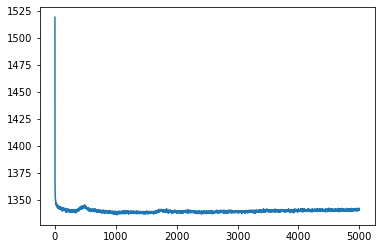

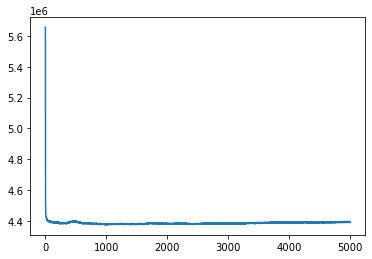

In [23]:
plt.plot(mae_history)
plt.show()
plt.plot(mse_history)
plt.show()